In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.float_format", "{:,.0f}".format)
pd.set_option('display.max_columns', None)


In [2]:
customers = pd.read_pickle("../customers.pkl")
products = pd.read_pickle("../products.pkl")
orders = pd.read_pickle("../orders.pkl")
order_items = pd.read_pickle("../order_items.pkl")
sessions = pd.read_pickle("../sessions.pkl")
returns = pd.read_pickle("../returns.pkl")
payments = pd.read_pickle("../payments.pkl")


In [3]:
payments['method'] = payments['method'].replace('cod' , 'card')

In [4]:
payments

,payment_id,order_id,customer_id_original,paid_at,currency_original,method,status,bill_total,final_bill
0,1,1,51069,2022-04-04 21:41:12,EGP,debit_card,Paid,110,110
3,2,2,50105,2024-11-20 19:50:30,INR,paypal,Failed,25,25
4,3,3,68331,2025-05-07 00:51:50,EGP,credit_card,Partially Refunded,88,148
10,4,4,80695,2023-12-01 02:25:01,GBP,credit_card,Paid,21,21
11,5,5,66044,2023-05-03 13:14:23,AED,credit_card,Paid,48,48
...,...,...,...,...,...,...,...,...,...
1016091,399996,399996,131043,2024-10-07 14:53:58,GBP,google_pay,Partially Refunded,86,120
1016094,399997,399997,79512,2025-02-03 17:09:11,INR,debit_card,Paid,96,96
1016096,399998,399998,9962,2025-04-28 17:45:01,GBP,debit_card,Paid,43,43
1016097,399999,399999,76425,2023-01-17 01:41:58,SAR,credit_card,Partially Refunded,490,866


In [5]:
customers.head()

,customer_id,first_name,last_name,email,gender,country
0,1,Gavin,Hamza,gavin.hamza@outlook.com,Male,USA
1,2,Jack,Salem,jackdotsalem@yahoodotcom,Male,France
2,3,WayNe,RogErs,wayne.rogers@hotmail.com,Male,Egypt
3,4,Austin,Reynolds,austin.reynolds@yahoo.com,Male,USA
4,5,Steven,ParKer,steven.parker@gmail.com,Male,Saudi Arabia


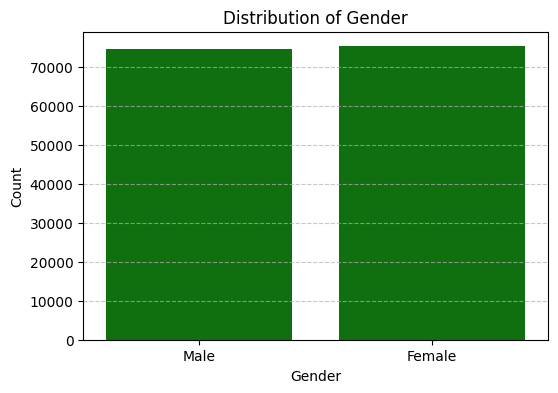

In [6]:
# Males VS Females
plt.figure(figsize=(6,4))
plt.title("Distribution of Gender")
sns.countplot(x="gender", data=customers, color="green")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [7]:
# to make countires looks more simple
customers['country'] = customers['country'].replace({
    'Saudi Arabia' : "KSA" , 
    "United Kingdom" : "UK" , 
    "United Arab Emirates" : "UAE"
})

In [8]:
customers['country'].value_counts()

country
UK         26037
Egypt      21456
USA        21437
India      17421
UAE        17324
KSA        17260
France     13070
Germany    12995
Unknown     3000
Name: count, dtype: int64

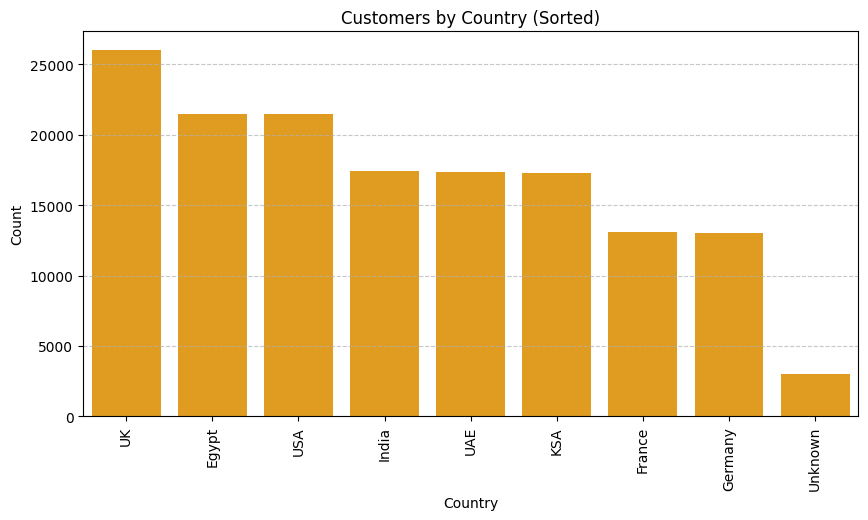

In [9]:
plt.figure(figsize=(10,5))

order = customers['country'].value_counts().index # return the array 

sns.countplot(
    x="country", 
    data=customers, 
    order=order,       # this is the one responsible for ordering
    color="orange"
)

plt.title("Customers by Country (Sorted)")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [10]:
# Top Customers That We have From UK , Egypt and lowest are from Germay and France

In [11]:
orders.head()

,order_id,customer_id,order_date,status
0,1,51069,2022-04-02 04:41:12,Delivered
1,2,50105,2024-11-19 21:50:30,Canceled
2,3,68331,2025-05-05 03:51:50,Partially Returned
3,4,80695,2023-11-29 21:25:01,Delivered
4,5,66044,2023-05-01 21:14:23,Delivered


In [12]:
orders['status'].value_counts()

status
Delivered             150567
Canceled               71588
Placed                 67862
Shipped                52167
Partially Returned     49406
Fully Returned          8410
Name: count, dtype: Int64

In [13]:
# let's check why it is retuend and what are the most products being retuened

In [14]:
# let's check why are so many orderd has been returned and cancalled
df_orders = orders.merge(order_items , on="order_id" , how="inner").merge(products , on="product_id" , how="inner")

C:\Users\omary\AppData\Local\Temp\ipykernel_13548\3866129613.py:2: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df_orders = orders.merge(order_items , on="order_id" , how="inner").merge(products , on="product_id" , how="inner")


In [15]:
df_orders.head()

,order_id,customer_id,order_date,status,order_item_id,product_id,quantity,is_returned,name,category,target_gender,price
0,1,51069,2022-04-02 04:41:12,Delivered,1,891,1,False,Initech Men's Perfume (Woody) Lite,Beauty,neutral,33
1,1,51069,2022-04-02 04:41:12,Delivered,2,1669,2,False,Wayne Sneakers Max,Fashion,male,33
2,1,51069,2022-04-02 04:41:12,Delivered,3,1273,1,False,Nova Aftershave Plus,Beauty,male,10
3,2,50105,2024-11-19 21:50:30,Canceled,4,600,1,False,Zen Smartphone Pro,Electronics,neutral,25
4,3,68331,2025-05-05 03:51:50,Partially Returned,5,700,2,False,Nova Leather Wallet Ultra,Fashion,male,18


In [16]:
df_orders[(df_orders['status'] == "Returned")] # this is the orders that has not been verified to be returned

,order_id,customer_id,order_date,status,order_item_id,product_id,quantity,is_returned,name,category,target_gender,price


In [17]:
# let's see if the returned items si from a spesific producst 
returned_products = df_orders.groupby(['status','product_id','name']).size().reset_index(name="Count")

In [18]:
Top_10_Cancelled_Products=returned_products[returned_products['status'] == "Canceled"].sort_values(by="Count" , ascending=False).head(10)
Top_10_Cancelled_Products

,status,product_id,name,Count
978,Canceled,1438,Acme Beard Oil Max,911
371,Canceled,427,Globex Aftershave Ultra,844
359,Canceled,411,Globex Men's Perfume (Woody) Plus,764
739,Canceled,971,Globex Beard Oil Max,712
626,Canceled,798,Acme Aftershave Ultra,701
686,Canceled,891,Initech Men's Perfume (Woody) Lite,681
356,Canceled,408,Acme Aftershave Lite,680
1049,Canceled,1590,Globex Leather Wallet Advanced,665
218,Canceled,243,Umbrella Sneakers Mini,664
661,Canceled,854,Soylent Jeans Ultra,632


In [19]:
Top_10_FullyReturned_Products = returned_products[returned_products['status']== 'Fully Returned'].sort_values(by="Count" , ascending=False).head(10)
Top_10_FullyReturned_Products

,status,product_id,name,Count
4187,Fully Returned,427,Globex Aftershave Ultra,55
4418,Fully Returned,798,Acme Aftershave Ultra,45
4470,Fully Returned,891,Initech Men's Perfume (Woody) Lite,44
4032,Fully Returned,228,Nova Men's Perfume (Woody) Plus,42
4175,Fully Returned,411,Globex Men's Perfume (Woody) Plus,39
4790,Fully Returned,1590,Globex Leather Wallet Advanced,39
4044,Fully Returned,243,Umbrella Sneakers Mini,38
4449,Fully Returned,854,Soylent Jeans Ultra,37
4264,Fully Returned,553,Globex Aftershave Lite,36
5071,Fully Returned,2351,Wayne Men's Perfume (Woody) Plus,35


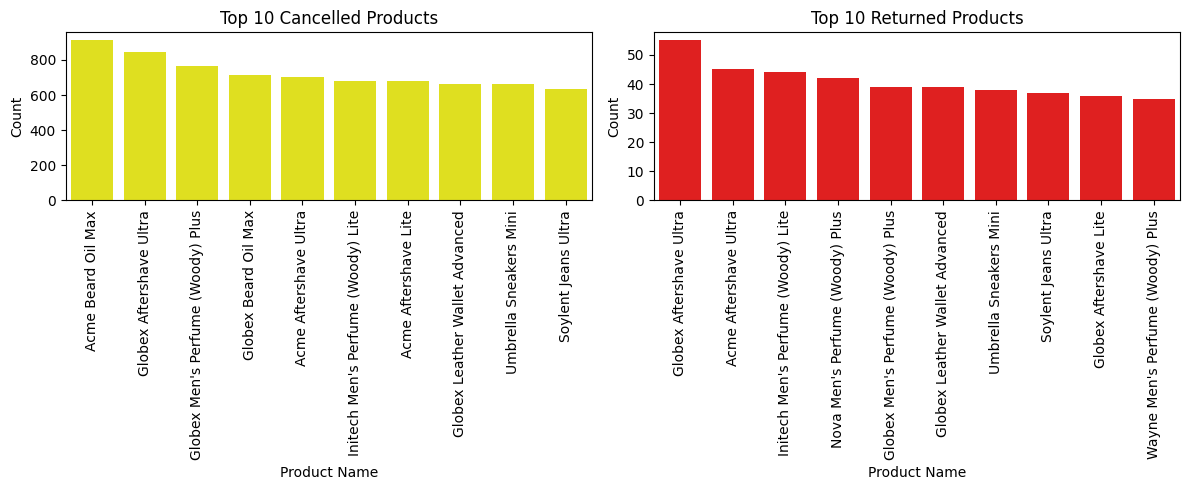

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))  # 1 row, 2 columns

# Left plot
sns.barplot(data=Top_10_Cancelled_Products, x="name", y="Count", ax=axes[0], color="yellow")
axes[0].set_title("Top 10 Cancelled Products")
axes[0].set_xlabel("Product Name")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis="x", rotation=90)

# Right plot
sns.barplot(data=Top_10_FullyReturned_Products, x="name", y="Count", ax=axes[1], color="red")
axes[1].set_title("Top 10 Returned Products")
axes[1].set_xlabel("Product Name")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis="x", rotation=90)

plt.tight_layout()   
plt.show()


In [21]:
# almost most products has been either cancelled or retunrned is the same 
# let's see why is it because price or what 

In [22]:
df_orders[df_orders['name'] == "Initech Men's Perfume (Woody) Lite"] # this products has one of the most canceeled and retuended

,order_id,customer_id,order_date,status,order_item_id,product_id,quantity,is_returned,name,category,target_gender,price
0,1,51069,2022-04-02 04:41:12,Delivered,1,891,1,False,Initech Men's Perfume (Woody) Lite,Beauty,neutral,33
466,192,64888,2025-04-14 04:15:11,Placed,493,891,2,False,Initech Men's Perfume (Woody) Lite,Beauty,neutral,33
532,218,1381,2022-11-29 14:27:49,Canceled,564,891,2,False,Initech Men's Perfume (Woody) Lite,Beauty,neutral,33
1178,491,98175,2021-10-05 09:52:01,Partially Returned,1240,891,5,False,Initech Men's Perfume (Woody) Lite,Beauty,neutral,33
1179,491,98175,2021-10-05 09:52:01,Partially Returned,1241,891,3,False,Initech Men's Perfume (Woody) Lite,Beauty,neutral,33
...,...,...,...,...,...,...,...,...,...,...,...,...
982675,399553,116941,2023-11-21 17:57:41,Canceled,1030820,891,4,False,Initech Men's Perfume (Woody) Lite,Beauty,neutral,33
983032,399699,54500,2023-08-17 18:22:56,Delivered,1031190,891,1,False,Initech Men's Perfume (Woody) Lite,Beauty,neutral,33
983077,399716,112228,2021-09-18 08:33:07,Canceled,1031236,891,3,False,Initech Men's Perfume (Woody) Lite,Beauty,neutral,33
983372,399837,94419,2025-02-11 18:33:26,Partially Returned,1031545,891,1,False,Initech Men's Perfume (Woody) Lite,Beauty,neutral,33


In [23]:
# let's deep more

df_orders = df_orders.merge(payments , on="order_id" , how="left") # now we compined all table to get more details

In [24]:
df_orders.head()

,order_id,customer_id,order_date,status_x,order_item_id,product_id,quantity,is_returned,name,category,target_gender,price,payment_id,customer_id_original,paid_at,currency_original,method,status_y,bill_total,final_bill
0,1,51069,2022-04-02 04:41:12,Delivered,1,891,1,False,Initech Men's Perfume (Woody) Lite,Beauty,neutral,33,1,51069,2022-04-04 21:41:12,EGP,debit_card,Paid,110,110
1,1,51069,2022-04-02 04:41:12,Delivered,2,1669,2,False,Wayne Sneakers Max,Fashion,male,33,1,51069,2022-04-04 21:41:12,EGP,debit_card,Paid,110,110
2,1,51069,2022-04-02 04:41:12,Delivered,3,1273,1,False,Nova Aftershave Plus,Beauty,male,10,1,51069,2022-04-04 21:41:12,EGP,debit_card,Paid,110,110
3,2,50105,2024-11-19 21:50:30,Canceled,4,600,1,False,Zen Smartphone Pro,Electronics,neutral,25,2,50105,2024-11-20 19:50:30,INR,paypal,Failed,25,25
4,3,68331,2025-05-05 03:51:50,Partially Returned,5,700,2,False,Nova Leather Wallet Ultra,Fashion,male,18,3,68331,2025-05-07 00:51:50,EGP,credit_card,Partially Refunded,88,148


In [25]:
# let's see in which time in the seassion the orders being ret/cancelled

df_orders['year'] = df_orders['order_date'].dt.year
df_orders['month'] = df_orders['order_date'].dt.month
df_orders['quarter'] = df_orders['order_date'].dt.quarter
df_orders['dayofweek'] = df_orders['order_date'].dt.dayofweek

In [26]:
df_orders.shape

(983783, 24)

In [27]:
Returned_Products = df_orders[df_orders['is_returned'] == True ] # let's focus on returned
Returned_Products.shape # 361692 order items has been retruned 

(63545, 24)

In [28]:
Returned_Products.head(5)

,order_id,customer_id,order_date,status_x,order_item_id,product_id,quantity,is_returned,name,category,target_gender,price,payment_id,customer_id_original,paid_at,currency_original,method,status_y,bill_total,final_bill,year,month,quarter,dayofweek
6,3,68331,2025-05-05 03:51:50,Partially Returned,7,1529,-2,True,Umbrella Coffee Maker Max,Home,neutral,15,3,68331,2025-05-07 00:51:50,EGP,credit_card,Partially Refunded,88,148,2025,5,2,0
15,7,35823,2024-02-05 08:22:03,Partially Returned,16,2296,-3,True,Stark Jeans Mini,Fashion,male,27,7,35823,2024-02-05 21:22:03,AED,card,Partially Refunded,-68,248,2024,2,1,0
16,7,35823,2024-02-05 08:22:03,Partially Returned,17,3254,-2,True,Umbrella Leather Wallet Mini,Fashion,male,38,7,35823,2024-02-05 21:22:03,AED,card,Partially Refunded,-68,248,2024,2,1,0
41,17,147272,2024-06-10 01:07:06,Partially Returned,44,3917,-4,True,Acme Dress Lite,Fashion,female,19,17,147272,2024-06-11 19:07:06,AED,card,Partially Refunded,96,249,2024,6,2,0
48,18,104898,2022-04-27 16:56:22,Partially Returned,51,1446,-1,True,Zen Sneakers Advanced,Fashion,male,14,18,104898,2021-04-28 20:56:22,INR,google_pay,Partially Refunded,50,77,2022,4,2,2


In [29]:
# Let's for now works on verified returned
Returned_Verified_Products = Returned_Products.copy()

In [30]:
Returned_Products_in_Quartier  = Returned_Verified_Products.groupby('quarter').size().reset_index(name="count")
Returned_Products_in_Quartier

,quarter,count
0,1,15448
1,2,15572
2,3,16728
3,4,15797


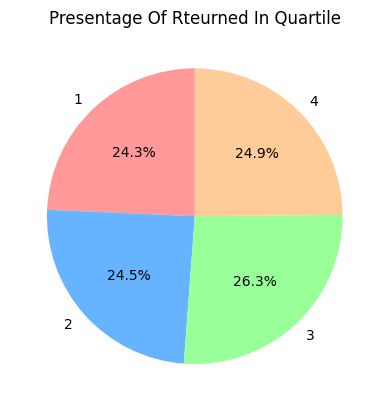

In [31]:
plt.Figure(figsize=(6,4))

plt.pie(
    data=Returned_Products_in_Quartier, 
    x="count" ,
    labels="quarter", 
    autopct='%1.1f%%',  # يكتب النسب المئوية
    startangle=90,
    colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']  # اختياري
)
plt.title("Presentage Of Rteurned In Quartile")
plt.show()

In [32]:
# we noticed that the 4,3 Q is the most of retuened
# let's see in details in month
Returned_Products_in_month  = Returned_Verified_Products.groupby('month').size().reset_index(name="count").sort_values(by='count')
Returned_Products_in_month

,month,count
1,2,4927
8,9,5029
3,4,5121
10,11,5123
0,1,5225
5,6,5225
4,5,5226
9,10,5240
6,7,5259
2,3,5296


<Axes: title={'center': 'Number Of Rteurned Order Items Within Month '}, xlabel='month', ylabel='count'>

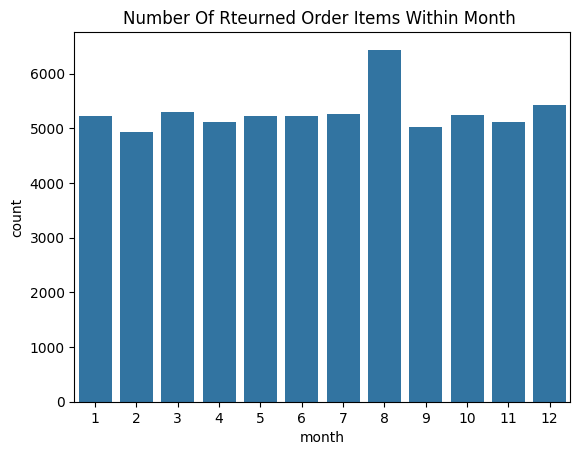

In [33]:
plt.Figure(figsize=(6,4))
plt.title("Number Of Rteurned Order Items Within Month ")
sns.barplot(data=Returned_Products_in_month , x="month" , y='count') # almost all the month have the same numbers of returned items let's see if this causes by a spesfic year or what 

In [34]:
Returned_Verified_Products.head(1)

,order_id,customer_id,order_date,status_x,order_item_id,product_id,quantity,is_returned,name,category,target_gender,price,payment_id,customer_id_original,paid_at,currency_original,method,status_y,bill_total,final_bill,year,month,quarter,dayofweek
6,3,68331,2025-05-05 03:51:50,Partially Returned,7,1529,-2,True,Umbrella Coffee Maker Max,Home,neutral,15,3,68331,2025-05-07 00:51:50,EGP,credit_card,Partially Refunded,88,148,2025,5,2,0


In [35]:
Returned_Products_in_year = Returned_Verified_Products.groupby(['year']).size().reset_index(name="count").sort_values(by='count' , ascending=False) 
Returned_Products_in_year

,year,count
3,2023,15705
2,2022,15479
4,2024,15205
5,2025,10181
1,2021,6755
0,2020,220


<Axes: title={'center': 'Number Of Rteurned Order Items Within Year '}, xlabel='year', ylabel='count'>

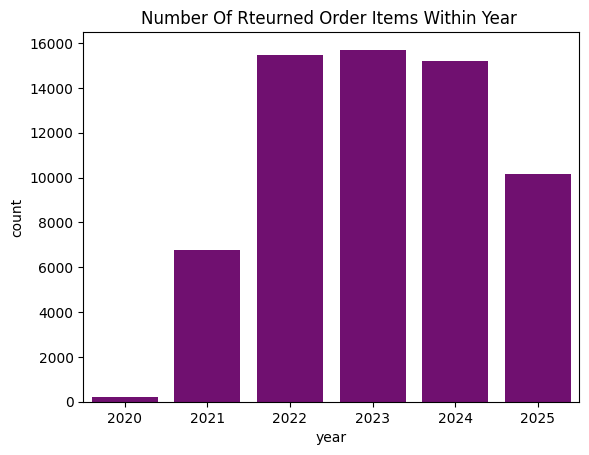

In [36]:
# 
plt.Figure(figsize=(6,4))
plt.title("Number Of Rteurned Order Items Within Year ")
sns.barplot(
    data=Returned_Products_in_year ,
    x="year" ,
    y='count' ,
     color="purple" 
    ) # almost all the month have the same numbers of returned items let's see if this causes by a spesfic year or what 

In [37]:
No_returns_per_month_year = Returned_Verified_Products.groupby(['month','year']).size().reset_index(name="count").sort_values(by='count' , ascending=False) 
No_returns_per_month_year

,month,year,count
60,12,2023,1426
37,8,2022,1381
12,3,2023,1374
58,12,2021,1373
48,10,2021,1365
...,...,...,...
5,2,2021,39
15,4,2021,36
20,5,2021,36
10,3,2021,33


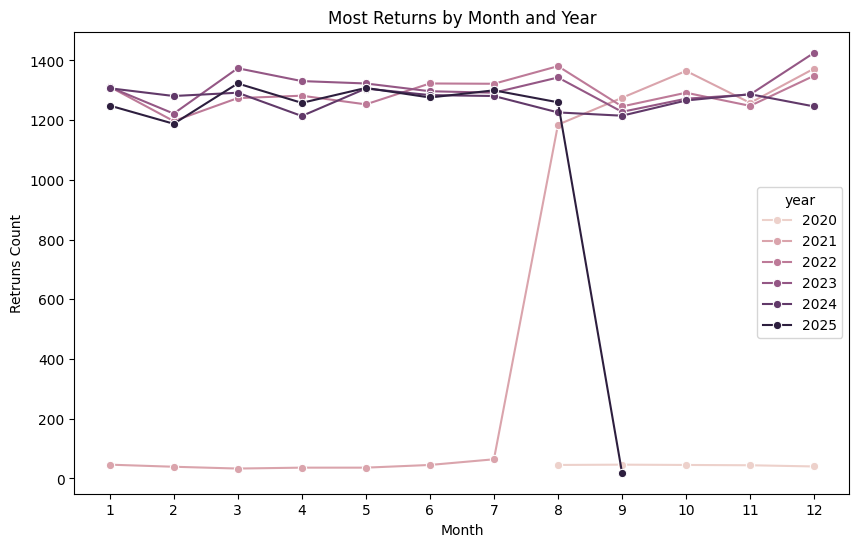

In [38]:
# let's by month and year 
plt.figure(figsize=(10,6))
sns.lineplot(
    data=No_returns_per_month_year,
    x="month",
    y="count",
    hue="year",      
    marker="o"
)
plt.title("Most Returns by Month and Year")
plt.xlabel("Month")
plt.ylabel("Retruns Count")
plt.xticks(range(1,13))  
plt.show()

In [39]:
# so many fiew returns in the first months in 2020 then it increesed in 7-2020 le's see why this incrresed of retuens is it walks with increesed orders so the retuns incressed

In [40]:
# let's see in which category has the most Returned 

Top_10_Returned_category = Returned_Verified_Products.groupby('category').size().reset_index(name="count")
Top_10_Returned_category

,category,count
0,Beauty,25926
1,Electronics,5034
2,Fashion,17948
3,Home,4857
4,Kids,4759
5,Sports,5021


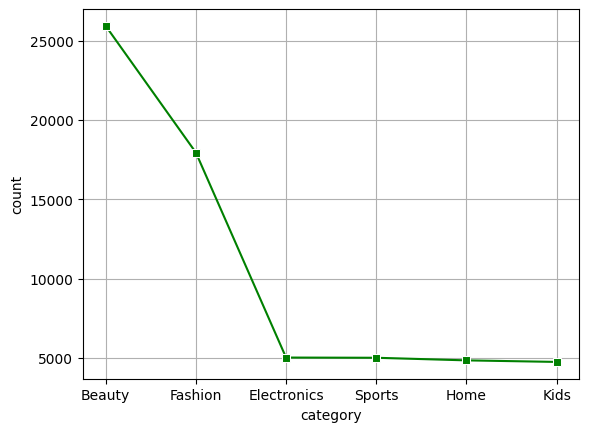

In [41]:

Top_10_Returned_category = Top_10_Returned_category.sort_values('count', ascending=False)

sns.lineplot(data=Top_10_Returned_category ,
              x='category' ,y='count' ,
                color="green" ,
                marker='s'
                
                )
plt.grid(True)

In [42]:
# we notised that most of the products that has been returned like beauty and fashion is targeted for both females and mens so let's see which one 
# let's see that more prescissley 

df_orders.columns

Index(['order_id', 'customer_id', 'order_date', 'status_x', 'order_item_id',
       'product_id', 'quantity', 'is_returned', 'name', 'category',
       'target_gender', 'price', 'payment_id', 'customer_id_original',
       'paid_at', 'currency_original', 'method', 'status_y', 'bill_total',
       'final_bill', 'year', 'month', 'quarter', 'dayofweek'],
      dtype='object')

In [43]:
Returned_By_target_gender = Returned_Verified_Products.groupby('target_gender').size().reset_index(name="count")
Returned_By_target_gender

,target_gender,count
0,??,3
1,female,12734
2,male,28256
3,neutral,22552


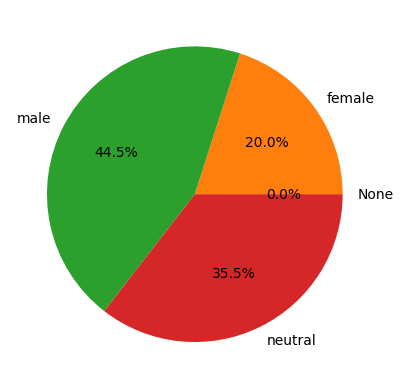

In [44]:
Returned_By_target_gender = Returned_By_target_gender.replace("??" , "None")
plt.Figure(figsize=(6,6))

plt.pie(
    data=Returned_By_target_gender ,
    x="count",
    labels="target_gender" ,
    autopct="%1.1f%%"
)

plt.show()

In [45]:
Returned_Verified_Products.head(1)

,order_id,customer_id,order_date,status_x,order_item_id,product_id,quantity,is_returned,name,category,target_gender,price,payment_id,customer_id_original,paid_at,currency_original,method,status_y,bill_total,final_bill,year,month,quarter,dayofweek
6,3,68331,2025-05-05 03:51:50,Partially Returned,7,1529,-2,True,Umbrella Coffee Maker Max,Home,neutral,15,3,68331,2025-05-07 00:51:50,EGP,credit_card,Partially Refunded,88,148,2025,5,2,0


In [46]:
Top_Returned_Verified_Products = Returned_Verified_Products.groupby('product_id').size().reset_index(name="count").sort_values(by="count" , ascending=False).head(20)
Top_Returned_Verified_Products = Top_Returned_Verified_Products.merge(products , on="product_id" , how="inner").drop_duplicates()
# Top_Returned_Verified_Products.shape

C:\Users\omary\AppData\Local\Temp\ipykernel_13548\640893006.py:2: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  Top_Returned_Verified_Products = Top_Returned_Verified_Products.merge(products , on="product_id" , how="inner").drop_duplicates()


In [47]:
Top_Returned_Verified_Products.head(5)

,product_id,count,name,category,target_gender,price
0,427,330,Globex Aftershave Ultra,Beauty,male,11
1,1438,299,Acme Beard Oil Max,Beauty,neutral,53
2,891,292,Initech Men's Perfume (Woody) Lite,Beauty,neutral,33
3,411,278,Globex Men's Perfume (Woody) Plus,Beauty,male,31
4,971,269,Globex Beard Oil Max,Beauty,male,22


In [48]:
products[products['product_id'] == 1438]

,product_id,name,category,target_gender,price
1437,"1,438",Acme Beard Oil Max,Beauty,neutral,53


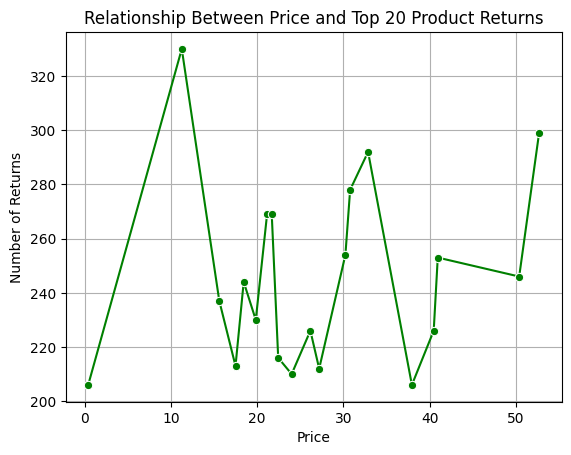

In [49]:
# # ترتيب Top 20 returned products
# top20 = Top_Returned_Verified_Products.sort_values("count", ascending=False).head(20)

sns.lineplot(
    data=Top_Returned_Verified_Products,
    x='price',
    y='count',
    marker="o",
    color="green"
)
plt.xlabel("Price")
plt.ylabel("Number of Returns")
plt.title("Relationship Between Price and Top 20 Product Returns")
plt.grid(True)
plt.show()
# no signs for returns becuz of price in fact most retruns for a single product was one of the lowest price

In [50]:
Returned_Verified_Products.head(1)

,order_id,customer_id,order_date,status_x,order_item_id,product_id,quantity,is_returned,name,category,target_gender,price,payment_id,customer_id_original,paid_at,currency_original,method,status_y,bill_total,final_bill,year,month,quarter,dayofweek
6,3,68331,2025-05-05 03:51:50,Partially Returned,7,1529,-2,True,Umbrella Coffee Maker Max,Home,neutral,15,3,68331,2025-05-07 00:51:50,EGP,credit_card,Partially Refunded,88,148,2025,5,2,0


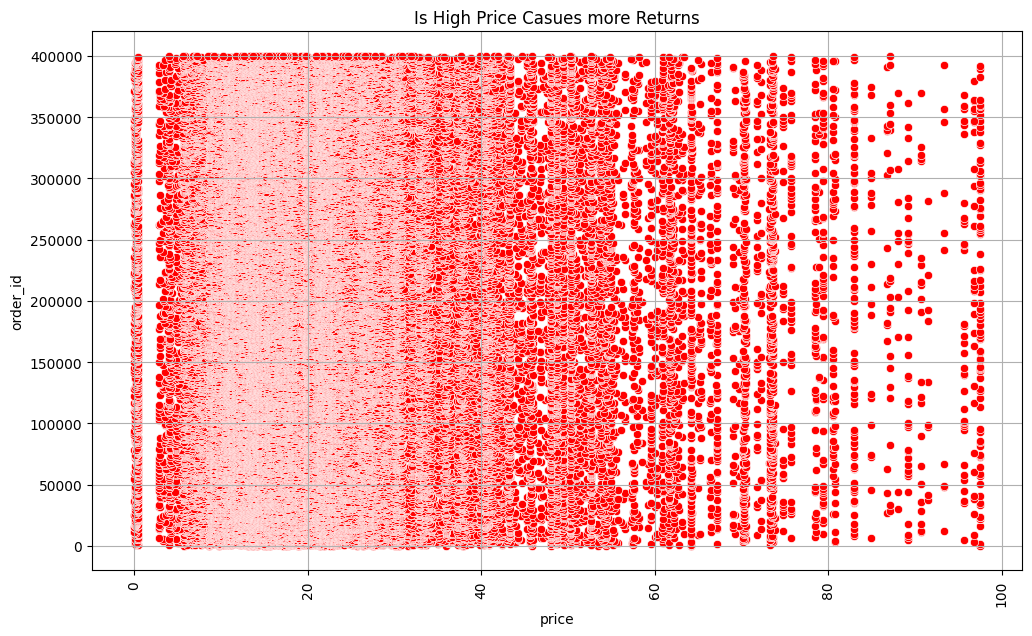

In [51]:
plt.figure(figsize=(12,7))
plt.title("Is High Price Casues more Returns")
sns.scatterplot(
    data=Returned_Verified_Products,
    x='price',
    y='order_id',
    color="red"
).grid()
plt.xticks(rotation=90)
plt.show() # no relationships of more price more returns

In [52]:
# let's go deeper and see why this so many returns 

In [53]:
returns['reason'].unique()

array(['Late delivery', 'Defective', 'Not as described',
       'Allergic reaction', 'Changed mind', 'Wrong size', 'Damaged item',
       'Better price elsewhere'], dtype=object)

In [54]:
returns.head(1)

,return_id,order_item_id,reason,return_date
0,1,841692,Late delivery,2024-12-25 10:29:19


In [55]:
Returned_Verified_Products = Returned_Verified_Products.merge(returns , on="order_item_id" , how="right")
Returned_Verified_Products.head(3)

,order_id,customer_id,order_date,status_x,order_item_id,product_id,quantity,is_returned,name,category,target_gender,price,payment_id,customer_id_original,paid_at,currency_original,method,status_y,bill_total,final_bill,year,month,quarter,dayofweek,return_id,reason,return_date
0,"326,275","87,802",2024-12-24 10:29:19,Partially Returned,841692,"3,172",-1,True,Wayne Running Shoes Ultra,Sports,neutral,29,"326,275","87,802",2024-12-25 05:29:19,GBP,apple_pay,Partially Refunded,202,260,"2,024",12,4,1,1,Late delivery,2024-12-25 10:29:19
1,"81,906","5,798",2023-07-22 09:49:38,Partially Returned,211762,"3,693",-1,True,Stark Laptop Advanced,Electronics,neutral,42,"81,906","5,798",2023-07-23 07:49:38,EGP,card,Partially Refunded,125,209,"2,023",7,3,5,2,Defective,2023-08-12 09:49:38
2,"70,945","8,259",2024-06-12 23:52:08,Partially Returned,183628,"1,393",-2,True,Initech Men's Perfume (Woody) Plus,Beauty,male,67,"70,945","8,259",2024-06-15 17:52:08,EGP,google_pay,Partially Refunded,-117,152,"2,024",6,2,2,3,Not as described,2024-06-13 23:52:08


In [56]:
# let's see the reasson why products are returned by customers rasons

products_returned_by_reasons = Returned_Verified_Products.groupby("reason").size().reset_index(name="count").sort_values(by="count" , ascending=False)
products_returned_by_reasons

,reason,count
1,Better price elsewhere,8394
0,Allergic reaction,8391
5,Late delivery,8363
6,Not as described,8335
3,Damaged item,8323
2,Changed mind,8271
7,Wrong size,8248
4,Defective,8244


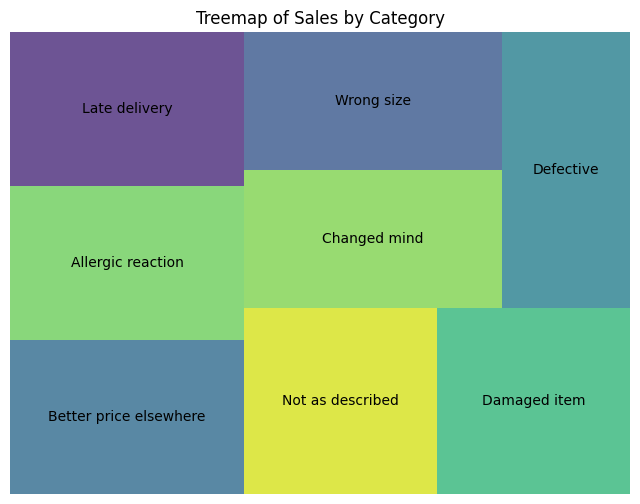

In [57]:
val = products_returned_by_reasons['reason'].values
size = products_returned_by_reasons['count'].values
import squarify  # مكتبة متخصصة في treemap

plt.figure(figsize=(8,6))
squarify.plot(sizes=size, label=val , alpha=0.8)
plt.axis("off")  
plt.title("Treemap of Sales by Category")
plt.show()

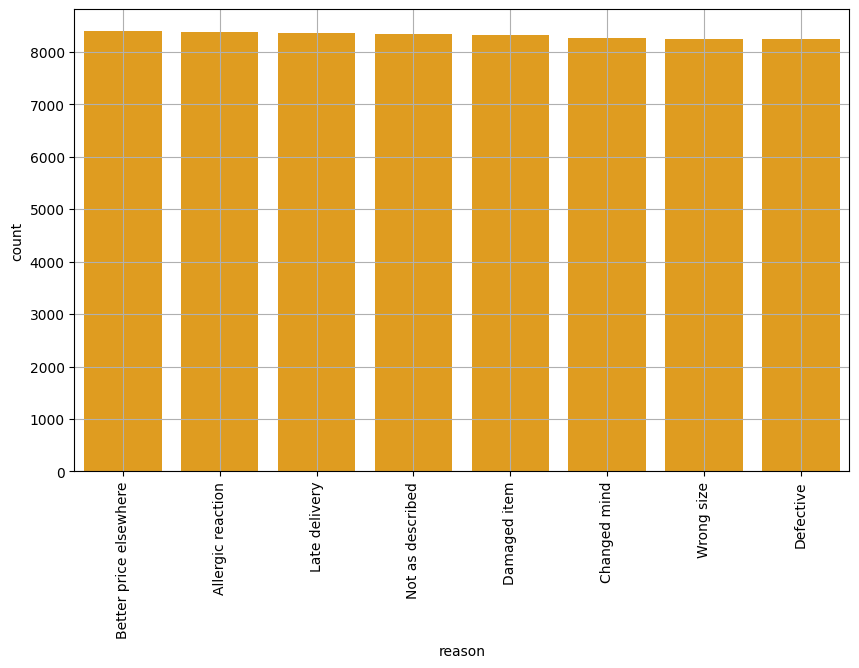

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(data=products_returned_by_reasons , x="reason" , y="count" , color="orange").grid()
plt.xticks(rotation=90)
# plt.grid(axis=y)
plt.show()

In [59]:
# we include that the returns is becuse overall the company policy no dicounts so customers find better places with lower price 
# also we the company that responible for delivery not good and the itms not descriped as mentioned means , wrong size ,and defectives
# allergic_reaction means that so many customers has a حساسيه من منتج معين طب خلينا نشوف ايه المنتجات الي بتسبب الحسلسيه دي كلها 

In [60]:
allergic_reaction__returned_items = Returned_Verified_Products[Returned_Verified_Products['reason'] == "Allergic reaction"]
allergic_reaction__returned_items.head(1)

,order_id,customer_id,order_date,status_x,order_item_id,product_id,quantity,is_returned,name,category,target_gender,price,payment_id,customer_id_original,paid_at,currency_original,method,status_y,bill_total,final_bill,year,month,quarter,dayofweek,return_id,reason,return_date
3,"221,329","59,442",2024-03-21 13:47:42,Partially Returned,571341,845,-2,True,Zen LED Lamp Mini,Home,neutral,22,"221,329","59,442",2024-03-23 10:47:42,USD,card,Partially Refunded,46,135,"2,024",3,1,3,4,Allergic reaction,2024-03-27 13:47:42


In [61]:
allergic_reaction__returned_items_groupedby_product = allergic_reaction__returned_items.groupby(["product_id"]).size().reset_index(name="count").sort_values(by="count" , ascending=True)
allergic_reaction__returned_items_groupedby_product.sort_values(by="count" , ascending=False).head(2)

,product_id,count
325,408,41
420,553,40


In [62]:
allergic_reaction__returned_itemsTop20 = allergic_reaction__returned_items_groupedby_product.sort_values(by="count" , ascending=False).head(20)

allergic_reaction__returned_itemsTop20.merge(products , on="product_id" , how="left").head(2)

,product_id,count,name,category,target_gender,price
0,408,41,Acme Aftershave Lite,Beauty,male,18
1,553,40,Globex Aftershave Lite,Beauty,male,40


In [63]:
allergic_reaction__returned_items.head(1)

,order_id,customer_id,order_date,status_x,order_item_id,product_id,quantity,is_returned,name,category,target_gender,price,payment_id,customer_id_original,paid_at,currency_original,method,status_y,bill_total,final_bill,year,month,quarter,dayofweek,return_id,reason,return_date
3,"221,329","59,442",2024-03-21 13:47:42,Partially Returned,571341,845,-2,True,Zen LED Lamp Mini,Home,neutral,22,"221,329","59,442",2024-03-23 10:47:42,USD,card,Partially Refunded,46,135,"2,024",3,1,3,4,Allergic reaction,2024-03-27 13:47:42


C:\Users\omary\AppData\Local\Temp\ipykernel_13548\2112930866.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=category_counts , x = "category" , y = "count" , palette="viridis")


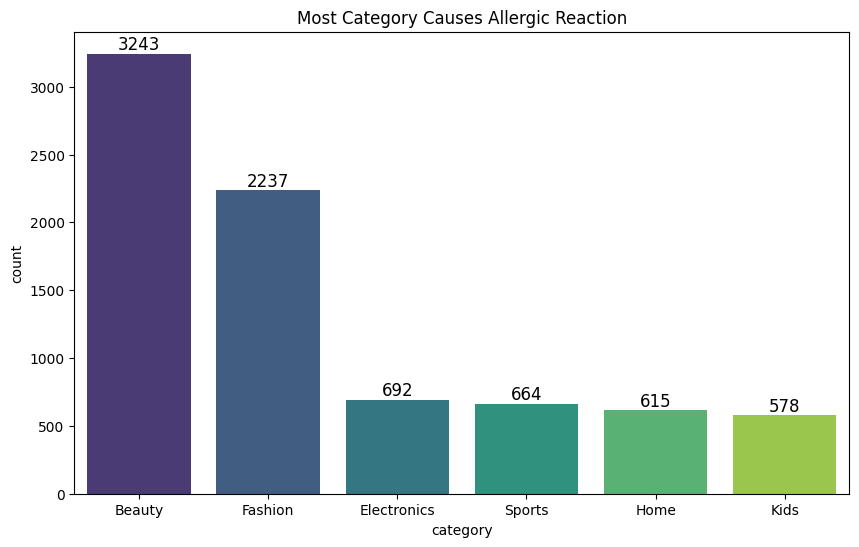

In [64]:
# most catageory causes 

plt.figure(figsize=(10,6))

category_counts = allergic_reaction__returned_items.groupby("category").size().reset_index(name="count").sort_values(by="count"  , ascending=False)

plt.title("Most Category Causes Allergic Reaction")
ax = sns.barplot(data=category_counts , x = "category" , y = "count" , palette="viridis")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha="center", va="bottom", fontsize=12, color="black")


plt.show()

In [65]:
#  We Fount That Most Category Causes Allergic Reaction is the one for Beauty and Fashion And that is excepeted
# let's see which products under theses is causes it 

products_that_causes_Allergic_Reaction = allergic_reaction__returned_items[allergic_reaction__returned_items['category'].isin(['Beauty' , 'Fashion'])].groupby('name').size().reset_index(name='count').sort_values(by="count", ascending=False).head(20)
products_that_causes_Allergic_Reaction

,name,count
1,Acme Aftershave Lite,41
86,Globex Aftershave Lite,40
8,Acme Beard Oil Max,38
311,Nova Men's Perfume (Woody) Plus,35
129,Globex Leather Wallet Advanced,34
94,Globex Beard Oil Max,34
189,Initech Beard Oil Ultra,33
659,Wayne Men's Perfume (Woody) Plus,33
228,Initech Men's Perfume (Woody) Lite,33
91,Globex Aftershave Ultra,32


C:\Users\omary\AppData\Local\Temp\ipykernel_13548\3766751864.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=products_that_causes_Allergic_Reaction ,


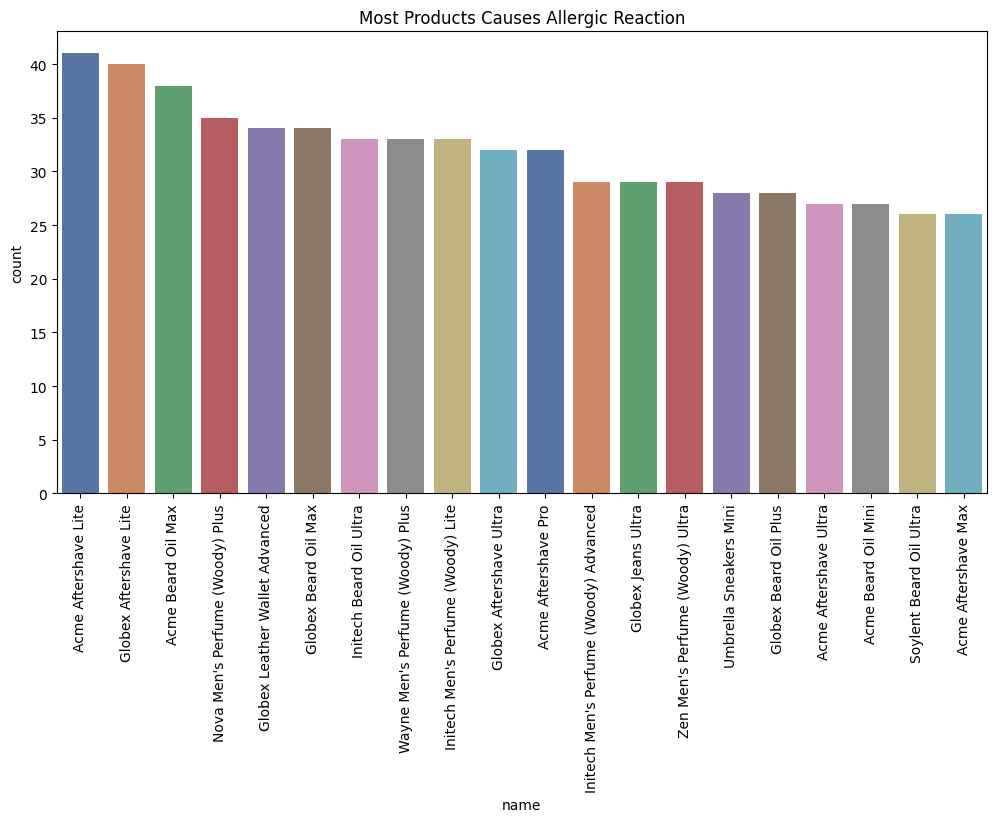

In [66]:

plt.figure(figsize=(12,6))
plt.title("Most Products Causes Allergic Reaction")
sns.barplot(data=products_that_causes_Allergic_Reaction , 
            x=products_that_causes_Allergic_Reaction['name'] , 
            y=products_that_causes_Allergic_Reaction['count'] ,
            palette= "deep"
            
            )
plt.xticks(rotation=90)
plt.show()

In [67]:
# نستنتج ان مشاكل الرجعايت تعود الي اساباب منها اولا عدم وجود العروض الكافيه حيث ان اكبر عدد من المسترجعات كانت بسبب انه
# العملاء وجدوا سعر افضل في مكان اخر 
# من الاسباب الاخر هو حساسيه الكاستمور من المنتج الاريج رياكشن ودامثببه منتجات كتير فيجب ان نرجع للمورد ونتحقق من هذا المنتجات اذا كانت اصليه ام لا 
# اسباب اخر ان المنتج وصل للعميل ولكن ليس كما هو موصوف يجب ان نحسن من وصف المنتج ونكتبه زي ما هو لا زياده ولا اثل 
# واحده من احدي الساباب الاري هو وصول المنتج للعميل تالف وممكن ده يرجع للسبين الاول هو شركه الشحن والثاني هو سوء التخزين 
# وغيره 

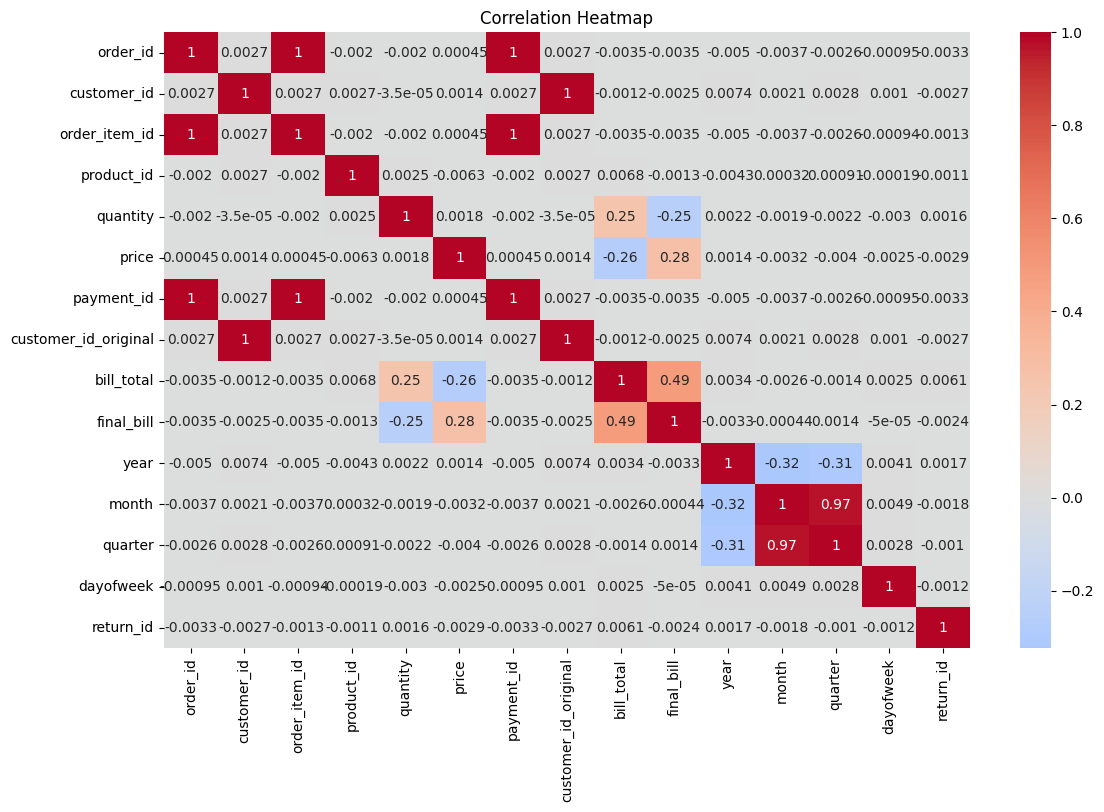

In [68]:
corr = Returned_Verified_Products.corr(numeric_only=True)
plt.figure(figsize=(13,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


Let's Work To See The Most Sold Products and dicouver more patterns


In [69]:
df_orders.head()

,order_id,customer_id,order_date,status_x,order_item_id,product_id,quantity,is_returned,name,category,target_gender,price,payment_id,customer_id_original,paid_at,currency_original,method,status_y,bill_total,final_bill,year,month,quarter,dayofweek
0,1,51069,2022-04-02 04:41:12,Delivered,1,891,1,False,Initech Men's Perfume (Woody) Lite,Beauty,neutral,33,1,51069,2022-04-04 21:41:12,EGP,debit_card,Paid,110,110,2022,4,2,5
1,1,51069,2022-04-02 04:41:12,Delivered,2,1669,2,False,Wayne Sneakers Max,Fashion,male,33,1,51069,2022-04-04 21:41:12,EGP,debit_card,Paid,110,110,2022,4,2,5
2,1,51069,2022-04-02 04:41:12,Delivered,3,1273,1,False,Nova Aftershave Plus,Beauty,male,10,1,51069,2022-04-04 21:41:12,EGP,debit_card,Paid,110,110,2022,4,2,5
3,2,50105,2024-11-19 21:50:30,Canceled,4,600,1,False,Zen Smartphone Pro,Electronics,neutral,25,2,50105,2024-11-20 19:50:30,INR,paypal,Failed,25,25,2024,11,4,1
4,3,68331,2025-05-05 03:51:50,Partially Returned,5,700,2,False,Nova Leather Wallet Ultra,Fashion,male,18,3,68331,2025-05-07 00:51:50,EGP,credit_card,Partially Refunded,88,148,2025,5,2,0


In [70]:
# most orderd Products 
most_orderd_Products = df_orders.loc[df_orders['status_x'].isin(['Delivered','Shipped', 'Placed']) , :].copy()
most_orderd_Products.head(5)


,order_id,customer_id,order_date,status_x,order_item_id,product_id,quantity,is_returned,name,category,target_gender,price,payment_id,customer_id_original,paid_at,currency_original,method,status_y,bill_total,final_bill,year,month,quarter,dayofweek
0,1,51069,2022-04-02 04:41:12,Delivered,1,891,1,False,Initech Men's Perfume (Woody) Lite,Beauty,neutral,33,1,51069,2022-04-04 21:41:12,EGP,debit_card,Paid,110,110,2022,4,2,5
1,1,51069,2022-04-02 04:41:12,Delivered,2,1669,2,False,Wayne Sneakers Max,Fashion,male,33,1,51069,2022-04-04 21:41:12,EGP,debit_card,Paid,110,110,2022,4,2,5
2,1,51069,2022-04-02 04:41:12,Delivered,3,1273,1,False,Nova Aftershave Plus,Beauty,male,10,1,51069,2022-04-04 21:41:12,EGP,debit_card,Paid,110,110,2022,4,2,5
10,4,80695,2023-11-29 21:25:01,Delivered,11,4324,2,False,Globex Dumbbells Set Plus,Sports,neutral,11,4,80695,2023-12-01 02:25:01,GBP,credit_card,Paid,21,21,2023,11,4,2
11,5,66044,2023-05-01 21:14:23,Delivered,12,3247,1,False,Nova Beard Oil Lite,Beauty,male,26,5,66044,2023-05-03 13:14:23,AED,credit_card,Paid,48,48,2023,5,2,0


In [71]:
most_orderd_Products['price_per_order_itme'] = most_orderd_Products['quantity'] * most_orderd_Products['price'].copy()

In [72]:
most_orderd_Products.head(2)

,order_id,customer_id,order_date,status_x,order_item_id,product_id,quantity,is_returned,name,category,target_gender,price,payment_id,customer_id_original,paid_at,currency_original,method,status_y,bill_total,final_bill,year,month,quarter,dayofweek,price_per_order_itme
0,1,51069,2022-04-02 04:41:12,Delivered,1,891,1,False,Initech Men's Perfume (Woody) Lite,Beauty,neutral,33,1,51069,2022-04-04 21:41:12,EGP,debit_card,Paid,110,110,2022,4,2,5,33
1,1,51069,2022-04-02 04:41:12,Delivered,2,1669,2,False,Wayne Sneakers Max,Fashion,male,33,1,51069,2022-04-04 21:41:12,EGP,debit_card,Paid,110,110,2022,4,2,5,67


In [73]:
most_orderd_Products_grouped = (
    most_orderd_Products
    .groupby(['name'])
    .agg({
        'quantity': 'sum',
        'price_per_order_itme': 'sum'
    })
    .reset_index()
)


In [74]:
most_orderd_Products_grouped.sort_values(by='price_per_order_itme' , ascending=False).head(10)

,name,quantity,price_per_order_itme
20,Acme Beard Oil Max,6625,"349,071"
456,Initech Beard Oil Ultra,4579,"230,690"
979,Soylent Men's Perfume (Woody) Mini,2984,"218,697"
352,Globex Men's Perfume (Woody) Ultra,1958,"190,827"
568,Initech Men's Perfume (Woody) Lite,5784,"190,062"
866,Soylent Beard Oil Ultra,4550,"186,277"
215,Globex Aftershave Lite,4510,"182,520"
441,Initech Aftershave Mini,3644,"175,058"
1625,Wayne Men's T-Shirt Max,2672,"171,382"
350,Globex Men's Perfume (Woody) Plus,5507,"169,505"


In [75]:
# most_orderd_Products_grouped['AOV'] = most_orderd_Products_grouped['price_per_order_itme'] / most_orderd_Products_grouped['quantity']

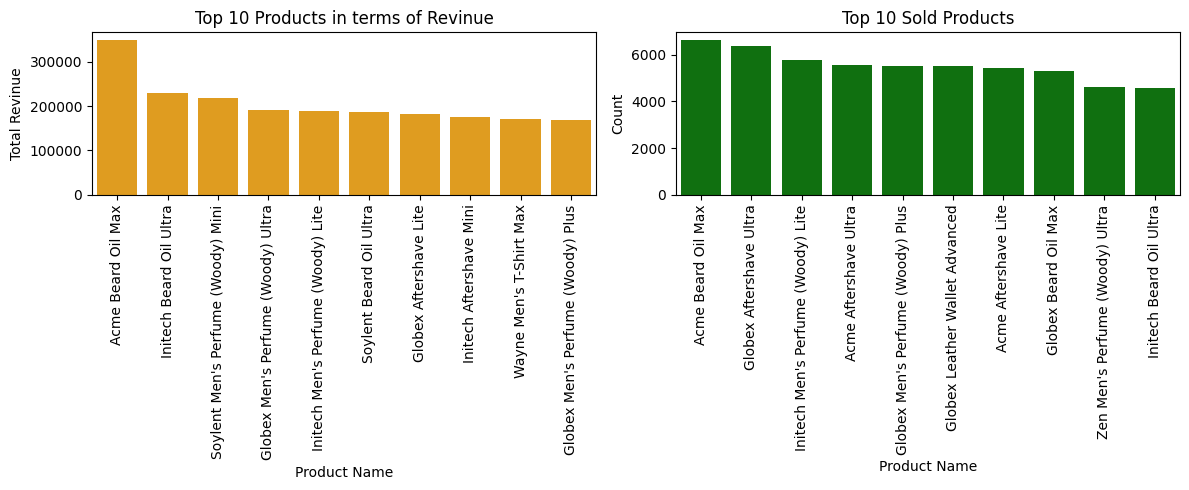

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))  # 1 row, 2 columns

# Left plot
sns.barplot(data=most_orderd_Products_grouped.sort_values(by='price_per_order_itme' , ascending=False).head(10),
             x="name",
               y="price_per_order_itme", 
               ax=axes[0],
                 color="orange")

axes[0].set_title("Top 10 Products in terms of Revinue")
axes[0].set_xlabel("Product Name")
axes[0].set_ylabel("Total Revinue")
axes[0].tick_params(axis="x", rotation=90)

# Right plot
sns.barplot(data=most_orderd_Products_grouped.sort_values(by='quantity' , ascending=False).head(10), 
            x="name", 
            y="quantity", ax=axes[1],
              color="green")
axes[1].set_title("Top 10 Sold Products")
axes[1].set_xlabel("Product Name")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis="x", rotation=90)

plt.tight_layout()   
plt.show()


In [77]:
# Most Revinue By Year and month 
hightest_revinue_per_product = most_orderd_Products.groupby(['month' , 'year']).size().reset_index(name="count")
hightest_revinue_per_product

,month,year,count
0,1,2021,387
1,1,2022,12857
2,1,2023,12898
3,1,2024,12734
4,1,2025,12326
...,...,...,...
57,12,2020,359
58,12,2021,12918
59,12,2022,13305
60,12,2023,13050


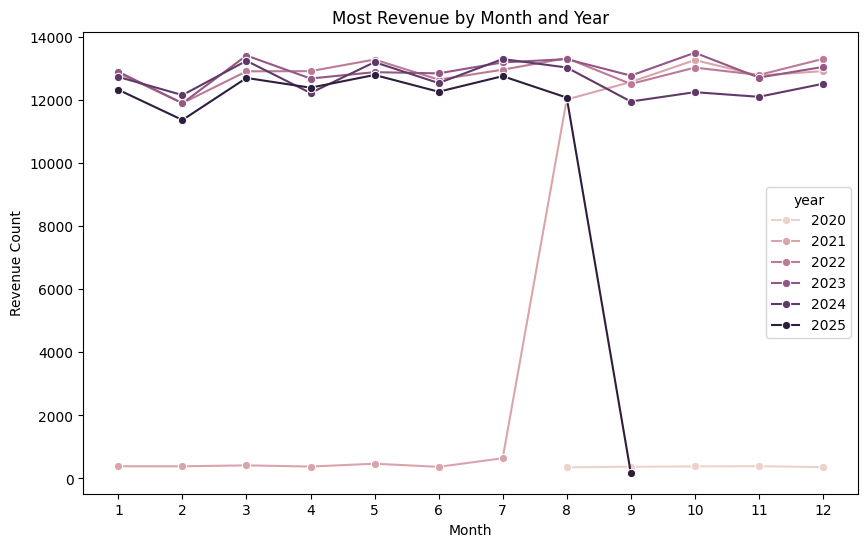

In [78]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=hightest_revinue_per_product,
    x="month",
    y="count",
    hue="year",      
    marker="o"
)
plt.title("Most Revenue by Month and Year")
plt.xlabel("Month")
plt.ylabel("Revenue Count")
plt.xticks(range(1,13))  
plt.show()

In [79]:
# e-commerse started at 8-2020 and starts earns a almost fixed reviune almost from 8-11 k  untill 7-2021 then the profits has jumped a big step to earns a revinue like almost
# 8000 k per motn and almost the e-commerse keeps this hight earns until 8-2025 but 9-2025 was the lowest

# let's see why these big jumps in 7-2021 and wht this big down in 9-2025 

In [80]:
# let's analyze 2021 
df_2021=most_orderd_Products[most_orderd_Products['year'] == 2021]

In [81]:
df_2021.head()

,order_id,customer_id,order_date,status_x,order_item_id,product_id,quantity,is_returned,name,category,target_gender,price,payment_id,customer_id_original,paid_at,currency_original,method,status_y,bill_total,final_bill,year,month,quarter,dayofweek,price_per_order_itme
78,30,87470,2021-08-19 20:44:09,Placed,82,19,4,False,Wayne Board Game Advanced,Kids,neutral,12,30,87470,2021-08-21 03:44:09,GBP,card,Pending,141,141,2021,8,3,3,47
79,30,87470,2021-08-19 20:44:09,Placed,83,242,2,False,Nova Wireless Headphones Mini,Electronics,neutral,19,30,87470,2021-08-21 03:44:09,GBP,card,Pending,141,141,2021,8,3,3,38
80,30,87470,2021-08-19 20:44:09,Placed,84,622,1,False,Nova Sneakers Pro,Fashion,male,27,30,87470,2021-08-21 03:44:09,GBP,card,Pending,141,141,2021,8,3,3,27
81,30,87470,2021-08-19 20:44:09,Placed,85,3265,1,False,Stark Beard Oil Mini,Beauty,male,30,30,87470,2021-08-21 03:44:09,GBP,card,Pending,141,141,2021,8,3,3,30
95,37,82182,2021-10-01 10:26:00,Placed,99,2076,2,False,Acme Nail Polish Plus,Beauty,female,17,37,82182,2021-10-03 20:26:00,AED,apple_pay,Pending,222,222,2021,10,4,4,33


In [82]:
df_2021['status_x'].value_counts()

status_x
Delivered    37848
Placed       16443
Shipped      12305
Name: count, dtype: Int64

In [83]:
# most orders items sold in each month 
df_2021_grouped = df_2021.groupby('month').size().reset_index(name="count")
df_2021_grouped

,month,count
0,1,387
1,2,386
2,3,415
3,4,378
4,5,467
5,6,369
6,7,641
7,8,12018
8,9,12573
9,10,13268


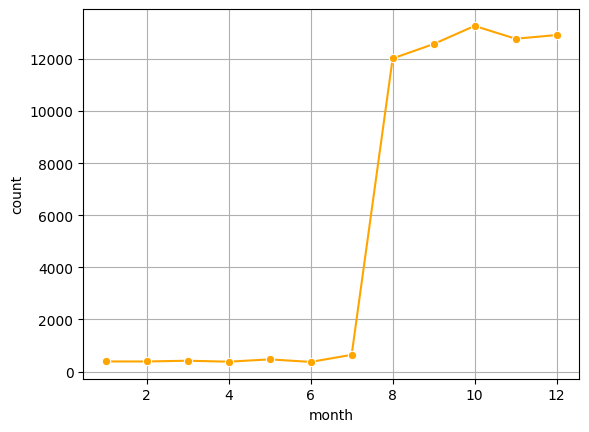

In [84]:
plt.Figure(figsize=(8,6))

sns.lineplot(data=df_2021_grouped  , x='month' , y='count' , marker='o' , color='orange').grid()
plt.show()
# from 8 month the nimbers of order items sold has signifacttly increesed

In [85]:
# let's see if we can see if this big jumps in 7-2021 is beacuse number of customers joined increesed

customers_sessions = customers.merge(sessions , on="customer_id" , how="right") #join the customers table and seesion will give us he first time this cutomer joind ud
# so now we sill have years of customers joind
customers_sessions.head(1)

,customer_id,first_name,last_name,email,gender,country,session_id,start_time,end_time,device,ip_address,user_agent,duration,browser
0,91363,JudiTh,Morales,judith.morales@yahoo.com,Female,KSA,1,2025-04-11 15:37:06,2025-04-11 18:07:06,Mobile,129.153.198.180,Mozilla/5.0 (compatible; MSIE 6.0; Windows CE;...,150,Mozilla/5.0


In [86]:
customers_sessions['year_of_session'] = customers_sessions['start_time'].dt.year
customers_sessions['month_of_session'] = customers_sessions['start_time'].dt.month
customers_sessions['quartor_of_session'] = customers_sessions['start_time'].dt.quarter

In [87]:
customers_sessions.head(1)

,customer_id,first_name,last_name,email,gender,country,session_id,start_time,end_time,device,ip_address,user_agent,duration,browser,year_of_session,month_of_session,quartor_of_session
0,91363,JudiTh,Morales,judith.morales@yahoo.com,Female,KSA,1,2025-04-11 15:37:06,2025-04-11 18:07:06,Mobile,129.153.198.180,Mozilla/5.0 (compatible; MSIE 6.0; Windows CE;...,150,Mozilla/5.0,2025,4,2


In [88]:
df = customers_sessions.groupby("customer_id")["year_of_session"].min().reset_index()
df

,customer_id,year_of_session
0,1,2022
1,2,2021
2,4,2023
3,5,2023
4,6,2021
...,...,...
144576,149995,2022
144577,149996,2022
144578,149997,2022
144579,149998,2021


In [89]:
number_of_customers_joind_per_year = df.groupby('year_of_session').size().reset_index(name='number_of_customers_joind').sort_values(by='number_of_customers_joind' )
number_of_customers_joind_per_year

,year_of_session,number_of_customers_joind
4,2025,3769
3,2024,11827
2,2023,26511
0,2021,43090
1,2022,59384


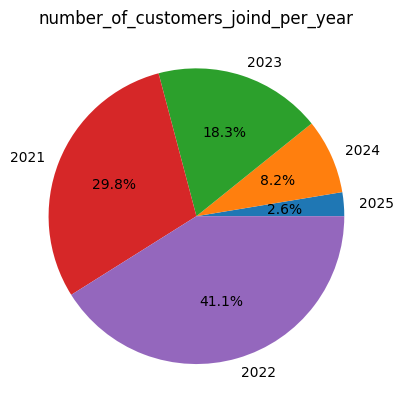

In [90]:
plt.Figure(figsize=(8,6))

plt.title("number_of_customers_joind_per_year")
plt.pie(x=number_of_customers_joind_per_year['number_of_customers_joind'] , labels=number_of_customers_joind_per_year['year_of_session'] , autopct='%1.1f%%')
plt.show()

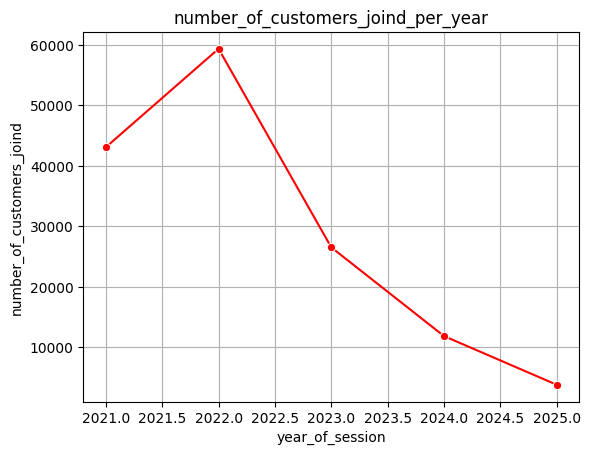

In [91]:
plt.Figure(figsize=(6,6))

plt.title("number_of_customers_joind_per_year")
sns.lineplot(
              x=number_of_customers_joind_per_year['year_of_session'] , 
              y=number_of_customers_joind_per_year['number_of_customers_joind'] ,
              color='red' ,
              marker='o').grid()
plt.show()

In [92]:
customers_sessions.head(1)

,customer_id,first_name,last_name,email,gender,country,session_id,start_time,end_time,device,ip_address,user_agent,duration,browser,year_of_session,month_of_session,quartor_of_session
0,91363,JudiTh,Morales,judith.morales@yahoo.com,Female,KSA,1,2025-04-11 15:37:06,2025-04-11 18:07:06,Mobile,129.153.198.180,Mozilla/5.0 (compatible; MSIE 6.0; Windows CE;...,150,Mozilla/5.0,2025,4,2


In [93]:
# نجيب أول سنة وشهر ظهر فيها كل customer_id
first_seen = customers_sessions.groupby("customer_id").agg({
    "year_of_session": "min",
    "month_of_session": "min"
}).reset_index()

# نعد عدد العملاء الجدد per (سنة, شهر)
new_customers_per_month = first_seen.groupby(
    ["year_of_session", "month_of_session"]
).size().reset_index(name="new_customers")

# نرتب النتائج
new_customers_per_month = new_customers_per_month.sort_values(
    ["year_of_session", "month_of_session"]
)

new_customers_per_month.head(15)


,year_of_session,month_of_session,new_customers
0,2021,1,10655
1,2021,2,7260
2,2021,3,6168
3,2021,4,4482
4,2021,5,3440
5,2021,6,2577
6,2021,7,2038
7,2021,8,2653
8,2021,9,1508
9,2021,10,1110


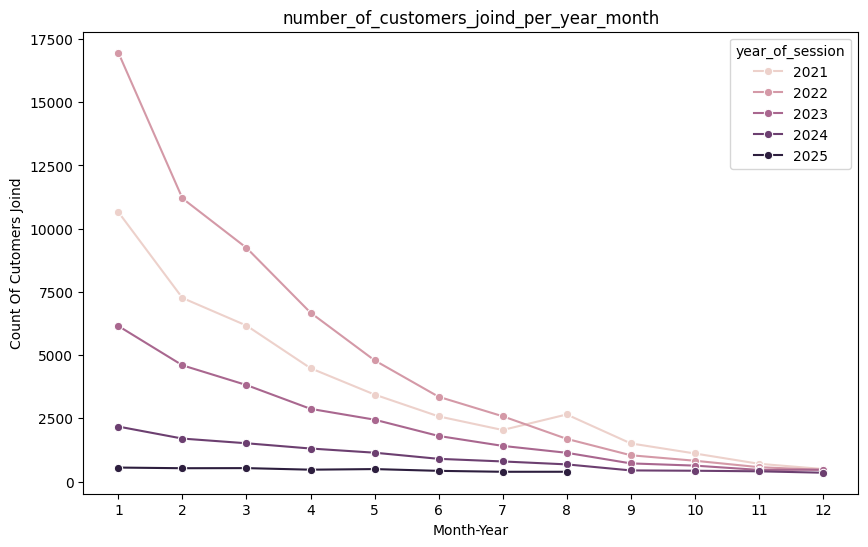

In [94]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=new_customers_per_month,
    x="month_of_session",
    y="new_customers",
    hue="year_of_session",      
    marker="o"
)
plt.title("number_of_customers_joind_per_year_month")
plt.xlabel("Month-Year")
plt.ylabel("Count Of Cutomers Joind")
plt.xticks(range(1,13))  
plt.show()

In [95]:
# We Found That almost first month of the years is the most of rageting customers

In [96]:
customers_sessions.head(1)

,customer_id,first_name,last_name,email,gender,country,session_id,start_time,end_time,device,ip_address,user_agent,duration,browser,year_of_session,month_of_session,quartor_of_session
0,91363,JudiTh,Morales,judith.morales@yahoo.com,Female,KSA,1,2025-04-11 15:37:06,2025-04-11 18:07:06,Mobile,129.153.198.180,Mozilla/5.0 (compatible; MSIE 6.0; Windows CE;...,150,Mozilla/5.0,2025,4,2


In [97]:
# نجيب أول سنة وشهر ظهر فيها كل customer_id
countires_by_numbers_od_customers = customers_sessions.groupby(['country' , 'year_of_session']).agg({
    "customer_id": "nunique",
    "session_id" : "nunique"
}).reset_index()


countires_by_numbers_od_customers.head(2)

,country,year_of_session,customer_id,session_id
0,Egypt,2021,6234,7335
1,Egypt,2022,12001,17604


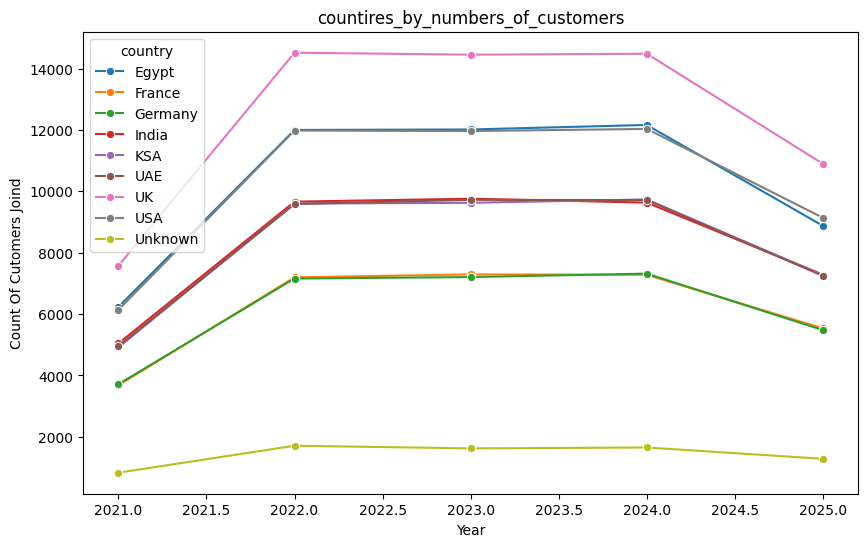

In [98]:
# هل في بلد معينة كانت وراء النمو وبعدين وقفت؟
plt.figure(figsize=(10,6))
sns.lineplot(
    data=countires_by_numbers_od_customers,
    x="year_of_session",
    y="customer_id",
    hue="country",      
    marker="o"
)
plt.title("countires_by_numbers_of_customers")
plt.xlabel("Year")
plt.ylabel("Count Of Cutomers Joind")

plt.show()

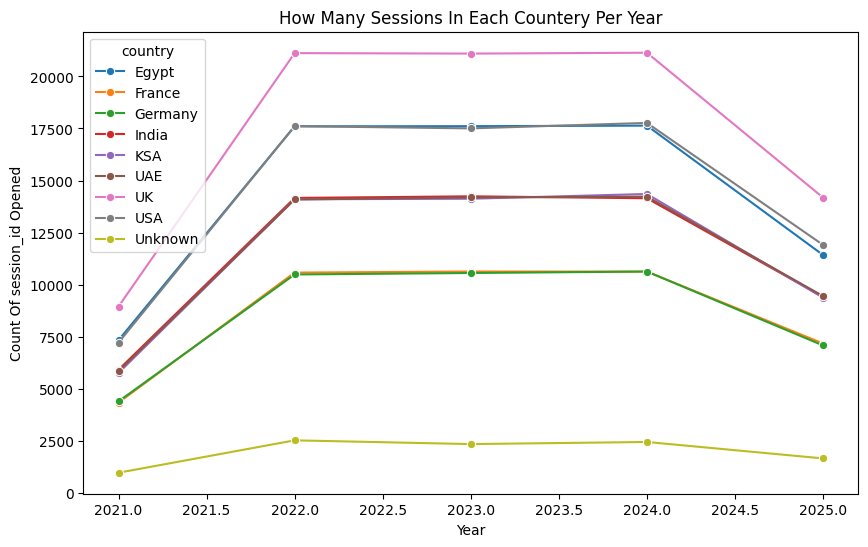

In [99]:
# هل في بلد معينة كانت وراء النمو وبعدين وقفت؟
plt.figure(figsize=(10,6))
sns.lineplot(
    data=countires_by_numbers_od_customers,
    x="year_of_session",
    y="session_id",
    hue="country",      
    marker="o"
)
plt.title("How Many Sessions In Each Countery Per Year")
plt.xlabel("Year")
plt.ylabel("Count Of session_id Opened")

plt.show()

In [100]:
# almost the same when numbers of cutomers increese number of seeiosns opened increesed

In [101]:
# الصوره لسه مش واصحه ليه بيحصل عندي نقص في الريفنيو خلينا 
# ل Cohort Analysis لتحليل Retention (يعني العميل بعد ما اشترى لأول مرة بيرجع تاني في الشهور اللي بعد كده ولا لأ) 

orders.head(15)

,order_id,customer_id,order_date,status
0,1,51069,2022-04-02 04:41:12,Delivered
1,2,50105,2024-11-19 21:50:30,Canceled
2,3,68331,2025-05-05 03:51:50,Partially Returned
3,4,80695,2023-11-29 21:25:01,Delivered
4,5,66044,2023-05-01 21:14:23,Delivered
5,6,15065,2023-10-12 12:39:48,Canceled
6,7,35823,2024-02-05 08:22:03,Partially Returned
7,8,12913,2021-12-21 05:17:27,Canceled
8,9,28514,2022-07-29 05:11:02,Delivered
9,10,79463,2025-03-09 10:19:51,Delivered


In [102]:
orders_for_cohort = orders[orders['status'].isin(['Delivered' , 'Partially Returned' , 'Placed' ,'Shipped'])].copy()
orders_for_cohort.head()

,order_id,customer_id,order_date,status
0,1,51069,2022-04-02 04:41:12,Delivered
2,3,68331,2025-05-05 03:51:50,Partially Returned
3,4,80695,2023-11-29 21:25:01,Delivered
4,5,66044,2023-05-01 21:14:23,Delivered
6,7,35823,2024-02-05 08:22:03,Partially Returned


In [103]:
orders_for_cohort['order_month'] = orders_for_cohort['order_date'].dt.to_period('M')

In [104]:
cohort = orders_for_cohort.groupby('customer_id')['order_month'].min()
orders_for_cohort = orders_for_cohort.join(cohort.rename('cohort_month'), on='customer_id')

In [105]:
def cohort_period(df):
    return (df['order_month'].dt.year - df['cohort_month'].dt.year) * 12 + \
           (df['order_month'].dt.month - df['cohort_month'].dt.month) + 1


In [106]:

orders_for_cohort['cohort_index'] = cohort_period(orders_for_cohort)
cohort_data = (orders_for_cohort.groupby(['cohort_month', 'cohort_index'])['customer_id']
                      .nunique()
                      .reset_index())
cohort_data.head()


,cohort_month,cohort_index,customer_id
0,2020-08,1,174
1,2020-08,8,1
2,2020-08,9,2
3,2020-08,13,7
4,2020-08,14,7


In [107]:

# 4) Pivot table لسهولة الرسم
cohort_pivot = cohort_data.pivot(index='cohort_month', 
                                 columns='cohort_index', 
                                 values='customer_id')

In [108]:
# 5) تحويل القيم لنسب retention
cohort_size = cohort_pivot.iloc[:,0]
retention = cohort_pivot.divide(cohort_size, axis=0)


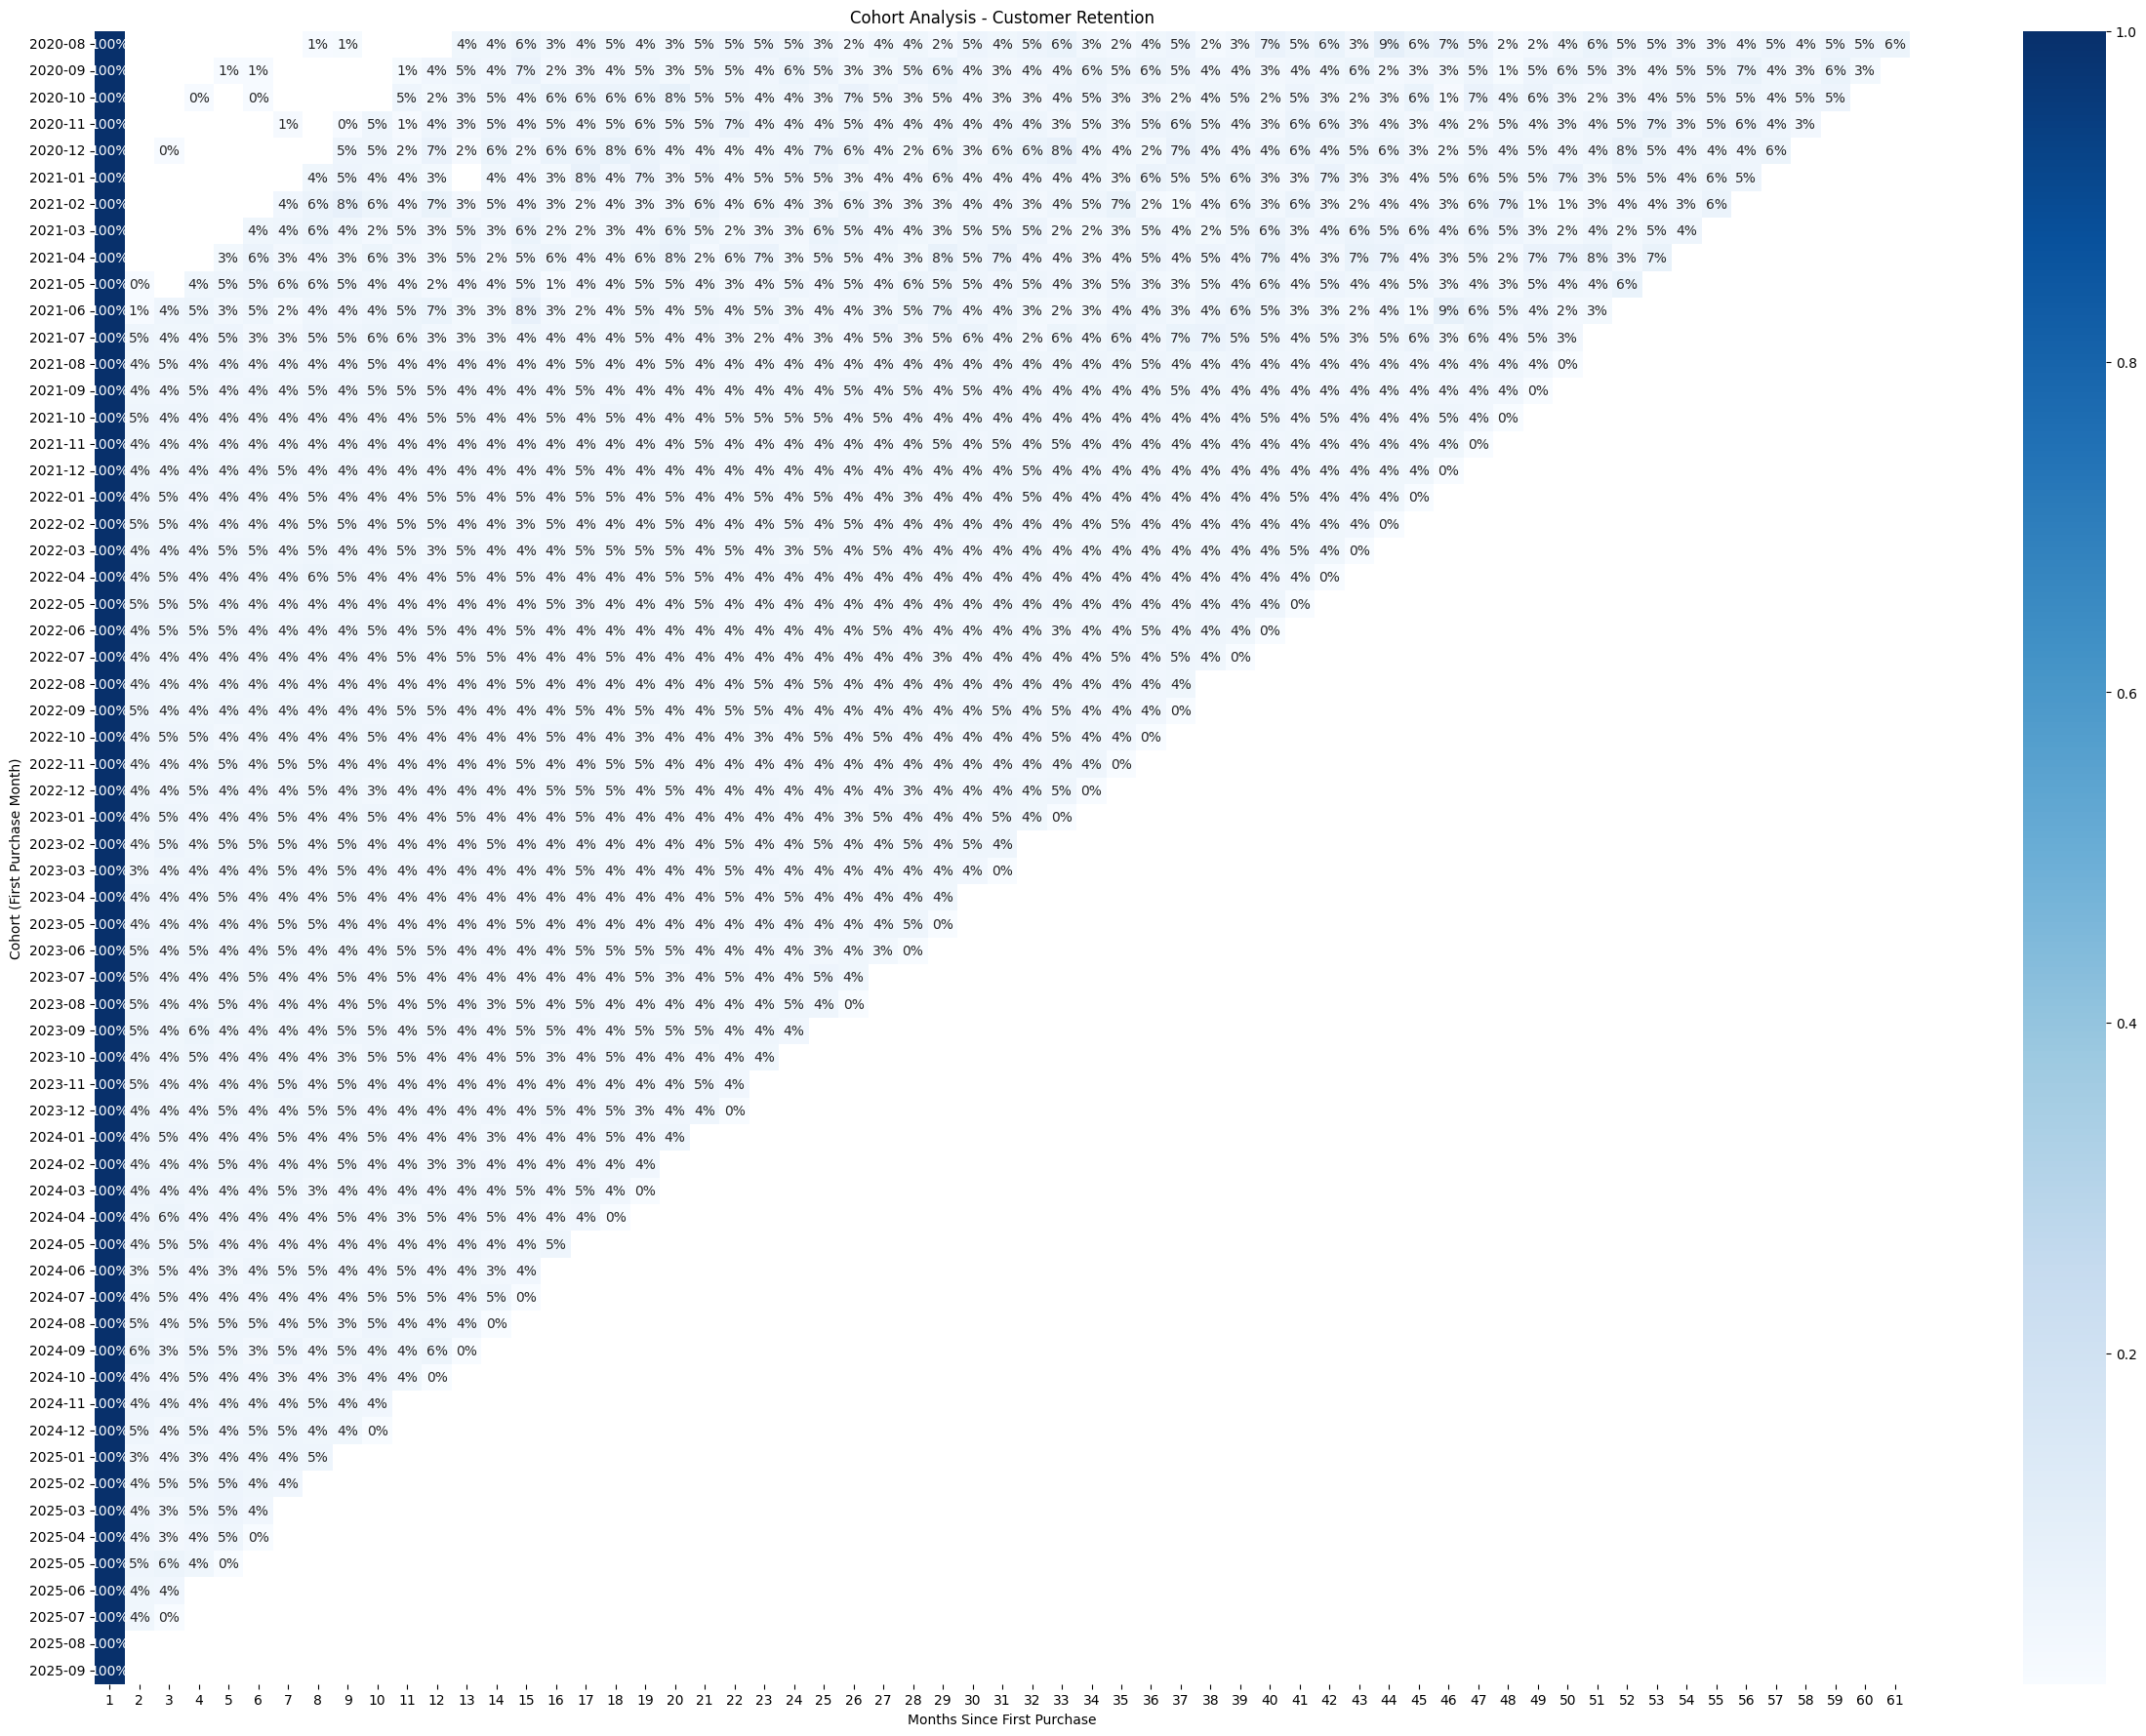

In [109]:
plt.figure(figsize=(30,22))
sns.heatmap(retention, annot=True, fmt=".0%", cmap="Blues")
plt.title('Cohort Analysis - Customer Retention')
plt.ylabel('Cohort (First Purchase Month)')
plt.xlabel('Months Since First Purchase')
plt.show()

In [110]:
# we found that most of cutomers that they did first ordered did not comeing back 
# onlu 5-7 % of the customers still buying 
# الاستنتاجات:

# معدل اكتساب العملاء (Acquisition) كويس: في عملاء جداد كل شهر.

# Retention ضعيف جدًا: معظم العملاء بيجربوا مرة واحدة بس.

# شريحة صغيرة فقط (5–7%) بتكمل: هما غالبًا أهم العملاء اللي بيدّوا قيمة حقيقية.

# مفيش تحسن عبر السنين: نفس النمط بيكرر نفسه → التجربة أو الخدمة محتاجة تطوير كبير.

In [111]:
# ماذا نفعل بناء على ده؟

# التركيز على تحسين التجربة بعد أول عملية شراء: onboarding، سهولة الاستخدام، المتابعة بخدمة عملاء.
# عمل Loyalty Programs / مكافآت: عشان تشجع العميل يرجع تاني.
# إرسال follow-up emails / offers بعد أول شراء: عشان تقلل الـ drop الكبير بعد الشهر الأول.
# تحليل الـ 5–7% المخلصين: ليه دول بس اللي بيكملوا؟ هل هما segment معين (سن، دخل، نوع منتج)

In [112]:
# ليه  5-7 % دول بس اللي بيكملوا؟

# العملاء اللي عملوا أكتر من 2 orders
orders_comppleted = orders[orders['status'].isin(['Delivered' , 'Partially Returned' , 'Placed' ,'Shipped'])].copy()
loyal_customers = orders_comppleted.groupby('customer_id')['order_date'].count()
loyal_customers = loyal_customers[loyal_customers > 2].index
loyal_customers


Index([     2,      5,     16,     19,     21,     22,     24,     25,     26,
           32,
       ...
       149973, 149980, 149981, 149986, 149988, 149990, 149993, 149996, 149999,
       150000],
      dtype='int64', name='customer_id', length=53933)

In [113]:
# now we have the loyal customers let's analyze them demograpohics , سلوك الشراء 

loyal_customers_orders = orders[orders['customer_id'].isin(loyal_customers)].merge(customers , on="customer_id" , how='left')
loyal_customers_orders.head()

,order_id,customer_id,order_date,status,first_name,last_name,email,gender,country
0,1,51069,2022-04-02 04:41:12,Delivered,Lina,JoneS,lina.jones@gmail.com,Female,Egypt
1,3,68331,2025-05-05 03:51:50,Partially Returned,WaltEr,Reyes,walter.reyes@gmail.com,Male,Egypt
2,5,66044,2023-05-01 21:14:23,Delivered,Paul,MitCheLl,paul.mitchell@hotmail.com,Male,UAE
3,12,47075,2023-06-22 04:25:00,Placed,Jack,Salem,jack.salem@hotmail.com,Male,UK
4,14,70703,2022-10-31 14:42:24,Delivered,Lawrence,RussEll,lawrence.russell@outlook.com,Male,UK


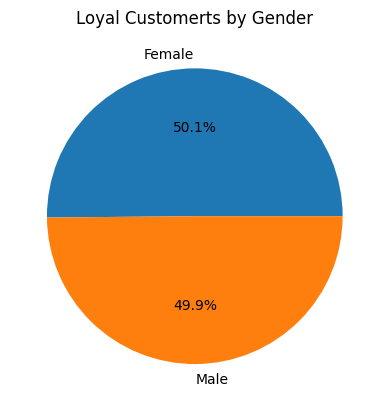

In [114]:


plt.Figure(figsize=(8,6))
plt.title("Loyal Customerts by Gender")
plt.pie(data=loyal_customers_orders.groupby('gender').size().reset_index(name='count')
         , x='count' 
         , labels='gender'
         , autopct='%1.1f%%')
plt.show()

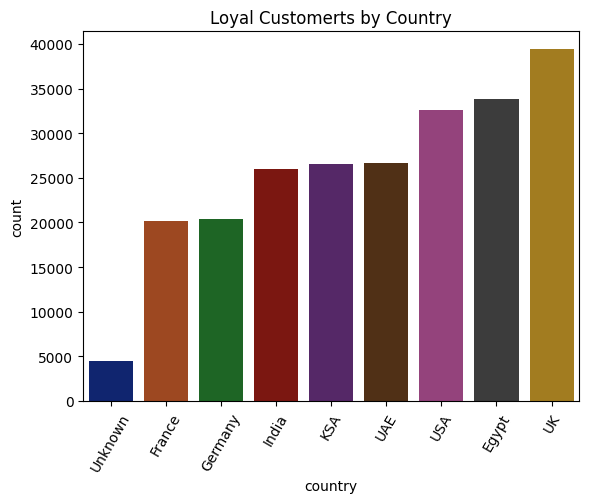

In [115]:
# let's see if these customers are from a spesific countries
plt.Figure(figsize=(10,6))

plt.title("Loyal Customerts by Country")
sns.barplot(data=loyal_customers_orders.groupby('country').size().reset_index(name='count').sort_values(by='count') , 
            x = 'country' , 
            y = 'count' , 
            hue='country' ,
            palette= "dark"
            )
plt.xticks(rotation=60)
plt.show() #our loyals customers are from uk , egypt and usa

In [116]:
# analyze سلوك الشراء

# let's see which category and products these cutomers are buying 

loyals_customers_begaiver = loyal_customers_orders.merge(order_items , on='order_id' , how='left').merge(products , on='product_id' , how='left')

loyals_customers_begaiver.head(2)


,order_id,customer_id,order_date,status,first_name,last_name,email,gender,country,order_item_id,product_id,quantity,is_returned,name,category,target_gender,price
0,1,51069,2022-04-02 04:41:12,Delivered,Lina,JoneS,lina.jones@gmail.com,Female,Egypt,1,891,1,False,Initech Men's Perfume (Woody) Lite,Beauty,neutral,33
1,1,51069,2022-04-02 04:41:12,Delivered,Lina,JoneS,lina.jones@gmail.com,Female,Egypt,2,"1,669",2,False,Wayne Sneakers Max,Fashion,male,33


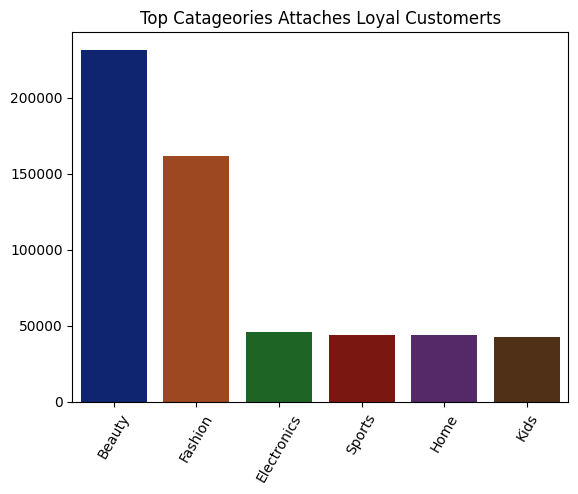

In [117]:
# let's see Top Catageories Attaches Loyal Customerts
plt.Figure(figsize=(10,6))

plt.title("Top Catageories Attaches Loyal Customerts")
sns.barplot(data=loyals_customers_begaiver.groupby('category').size().reset_index(name='count').sort_values(by='count' ,ascending=False) , 
            x = 'category' , 
            y = 'count' , 
            hue='category' ,
            palette= "dark"
            )
plt.xticks(rotation=60)
plt.xlabel(None)
plt.ylabel(None)
plt.show() #our loyals customers buying an beauty and fashions things

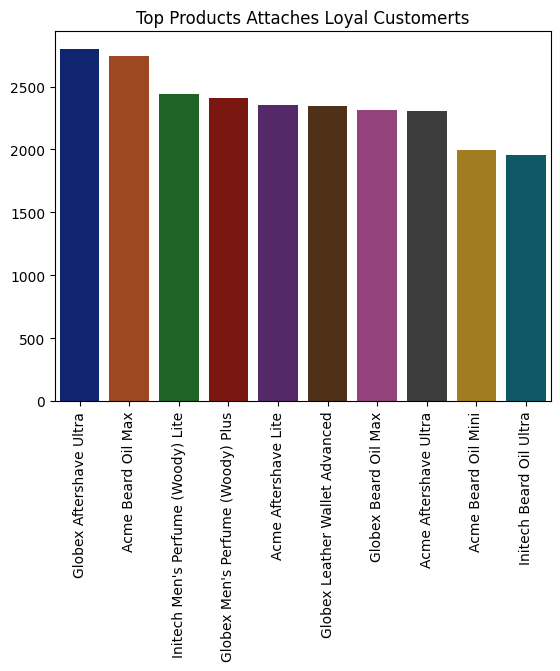

In [118]:
# let's see now focues  on Top Products Within these Catageories Attaches Loyal Customerts
plt.Figure(figsize=(10,6))

plt.title("Top Products Attaches Loyal Customerts")
sns.barplot(data=loyals_customers_begaiver.groupby('name').size().reset_index(name='count').sort_values(by='count' ,ascending=False).head(10) , 
            x = 'name' , 
            y = 'count' , 
            hue='name' ,
            palette= "dark"
            )
plt.xticks(rotation=90)
plt.xlabel(None)
plt.ylabel(None)
plt.show() #our loyals customers buying an beauty and fashions things

In [119]:
orders_comppleted=orders_comppleted.merge(payments , on='order_id' , how='left' )


In [120]:
orders_comppleted.head(10)

,order_id,customer_id,order_date,status_x,payment_id,customer_id_original,paid_at,currency_original,method,status_y,bill_total,final_bill
0,1,51069,2022-04-02 04:41:12,Delivered,1,51069,2022-04-04 21:41:12,EGP,debit_card,Paid,110,110
1,3,68331,2025-05-05 03:51:50,Partially Returned,3,68331,2025-05-07 00:51:50,EGP,credit_card,Partially Refunded,88,148
2,4,80695,2023-11-29 21:25:01,Delivered,4,80695,2023-12-01 02:25:01,GBP,credit_card,Paid,21,21
3,5,66044,2023-05-01 21:14:23,Delivered,5,66044,2023-05-03 13:14:23,AED,credit_card,Paid,48,48
4,7,35823,2024-02-05 08:22:03,Partially Returned,7,35823,2024-02-05 21:22:03,AED,card,Partially Refunded,-68,248
5,9,28514,2022-07-29 05:11:02,Delivered,9,28514,2022-07-31 01:11:02,GBP,credit_card,Paid,245,245
6,10,79463,2025-03-09 10:19:51,Delivered,10,79463,2025-03-10 14:19:51,AED,apple_pay,Paid,243,243
7,11,91989,2024-03-17 08:01:27,Shipped,11,91989,2024-03-18 17:01:27,SAR,google_pay,Paid,45,45
8,12,47075,2023-06-22 04:25:00,Placed,12,47075,2023-06-24 19:25:00,GBP,apple_pay,Pending,0,0
9,13,36931,2022-06-22 01:41:58,Shipped,13,36931,2022-06-22 16:41:58,INR,paypal,Paid,215,215


In [121]:
def update_bill_total_Partially_Refunded(row):
    if row["status_y"] == 'Partially Refunded' :
        return  row['final_bill'] -  abs(row["bill_total"])
    return 0

In [122]:
# 1) حساب refund amount (لو عندك عمود refund واضح)
orders_comppleted['refund_amount'] = orders_comppleted.apply(update_bill_total_Partially_Refunded , axis=1)

# 2) صافي الإيراد بعد الخصم/الإرجاع
orders_comppleted['net_profit'] = (
    orders_comppleted['final_bill'] - orders_comppleted['refund_amount']
)


In [187]:
orders_comppleted[orders_comppleted['status_y'].isin(['Partially Refunded'])].head(20)

,order_id,customer_id,order_date,status_x,payment_id,customer_id_original,paid_at,currency_original,method,status_y,bill_total,final_bill,refund_amount,net_profit
1,3,68331,2025-05-05 03:51:50,Partially Returned,3,68331,2025-05-07 00:51:50,EGP,credit_card,Partially Refunded,88,148,60,88
4,7,35823,2024-02-05 08:22:03,Partially Returned,7,35823,2024-02-05 21:22:03,AED,card,Partially Refunded,-68,248,180,68
12,17,147272,2024-06-10 01:07:06,Partially Returned,17,147272,2024-06-11 19:07:06,AED,card,Partially Refunded,96,249,152,96
13,18,104898,2022-04-27 16:56:22,Partially Returned,18,104898,2021-04-28 20:56:22,INR,google_pay,Partially Refunded,50,77,27,50
18,25,39665,2023-04-21 10:01:14,Partially Returned,25,39665,2023-04-22 06:01:14,EGP,debit_card,Partially Refunded,69,223,154,69
44,61,19057,2024-02-18 07:56:10,Partially Returned,61,19057,2024-02-19 07:56:10,GBP,card,Partially Refunded,-44,170,125,44
46,63,16836,2023-09-05 08:15:36,Partially Returned,63,16836,2023-09-07 14:15:36,GBP,debit_card,Partially Refunded,163,241,78,163
53,71,75717,2023-10-06 19:00:19,Partially Returned,71,75717,2023-11-09 18:00:19,EGP,apple_pay,Partially Refunded,-77,149,71,77
63,85,6222,2024-09-13 09:53:33,Partially Returned,85,6222,2024-09-15 11:53:33,GBP,paypal,Partially Refunded,-64,237,172,64
68,90,144251,2023-08-29 12:32:29,Partially Returned,90,144251,2023-08-31 06:32:29,AED,card,Partially Refunded,-21,83,62,21


In [ ]:
# let's analuze Avg Order Valuse we will use orders_comppleted df that we used upove
# متوسط AOV لكل عميل
avg_ = orders_comppleted.groupby('customer_id')['net_profit'].mean()
order_counts = orders_comppleted.groupby('customer_id')['order_id'].count()


In [214]:
loyal_aov = avg_.loc[avg_.index.isin(loyal_customers)]
non_loyal_aov = avg_.loc[~avg_.index.isin(loyal_customers)]

print("Average AOV of loyal customers:", loyal_aov.mean())
print("Average AOV of non-loyal customers:", non_loyal_aov.mean())


Average AOV of loyal customers: 121.59936851851852
Average AOV of non-loyal customers: 113.41238101720299


In [126]:
loyal_aov.shape

(53933,)

In [127]:
non_loyal_aov.shape

(78120,)

C:\Users\omary\AppData\Local\Temp\ipykernel_13548\2357136758.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Loyal Customers', 'Non-Loyal Customers'])


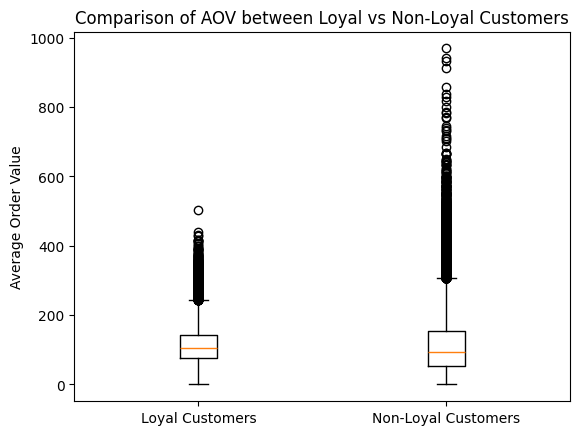

In [128]:
data = [
    loyal_aov.values,
    non_loyal_aov.values
]

plt.boxplot(data, labels=['Loyal Customers', 'Non-Loyal Customers'])
plt.title('Comparison of AOV between Loyal vs Non-Loyal Customers')
plt.ylabel('Average Order Value')
plt.show()

In [129]:
# from the boxplot we explain :
# Loyals aren't loyal because they have a high AOV, but because they buy more often.
# What makes them "loyal" is frequency, not order size.
# Non-loyal customers have more variety in order size.
# Some customers try a product for the first time and spend a large amount (high spenders) but don't return.
# It appears that their AOV may be higher than some loyal customers.
# Loyal customers are more stable.
# Their spending patterns are similar and not as extreme as those of non-loyal customers.

# Insight 
# Attracting high-volume customers (AOV) doesn't mean they'll remain loyal.
# Loyal customers are often "consistent medium spenders."
# The key to increasing loyalty may not lie in increasing AOV, but in:
# Loyalty programs.
# Personalization.
# Incentives for repeat purchases.

Let's See Number Of Orders Has Made For Each One Of theses

In [130]:
customers

,customer_id,first_name,last_name,email,gender,country
0,1,Gavin,Hamza,gavin.hamza@outlook.com,Male,USA
1,2,Jack,Salem,jackdotsalem@yahoodotcom,Male,France
2,3,WayNe,RogErs,wayne.rogers@hotmail.com,Male,Egypt
3,4,Austin,Reynolds,austin.reynolds@yahoo.com,Male,USA
4,5,Steven,ParKer,steven.parker@gmail.com,Male,KSA
...,...,...,...,...,...,...
149995,149996,Cameron,Mason,cameron.mason@gmail.com,Male,Germany
149996,149997,Douglas,Reed,douglas.reed@gmail.com,Male,KSA
149997,149998,Heather,Taha,heather.taha@outlook.com,Female,UAE
149998,149999,Patricia,Naser,patricia.naser@gmail.com,Female,KSA


In [131]:
customers['is_loyal'] = np.where(
    customers['customer_id'].isin(loyal_aov.index) , 
    True , 
    False
)

In [132]:
count_od_orders_made = customers.merge(orders_for_cohort , on='customer_id' , how='right')
count_od_orders_made.head(5)

,customer_id,first_name,last_name,email,gender,country,is_loyal,order_id,order_date,status,order_month,cohort_month,cohort_index
0,51069,Lina,JoneS,lina.jones@gmail.com,Female,Egypt,True,1,2022-04-02 04:41:12,Delivered,2022-04,2022-04,1
1,68331,WaltEr,Reyes,walter.reyes@gmail.com,Male,Egypt,True,3,2025-05-05 03:51:50,Partially Returned,2025-05,2021-10,44
2,80695,Robert,MenDez,robert.mendez@gmail.com,Male,UK,False,4,2023-11-29 21:25:01,Delivered,2023-11,2023-11,1
3,66044,Paul,MitCheLl,paul.mitchell@hotmail.com,Male,UAE,True,5,2023-05-01 21:14:23,Delivered,2023-05,2023-05,1
4,35823,Russell,Gomez,russell.gomez@hotmail.com,Male,UAE,False,7,2024-02-05 08:22:03,Partially Returned,2024-02,2024-02,1


In [133]:
count_of_orders_made_for_loyal_nonloyal = count_od_orders_made.groupby("is_loyal").size().reset_index(name='count')
count_of_orders_made_for_loyal_nonloyal

,is_loyal,count
0,False,118369
1,True,201633


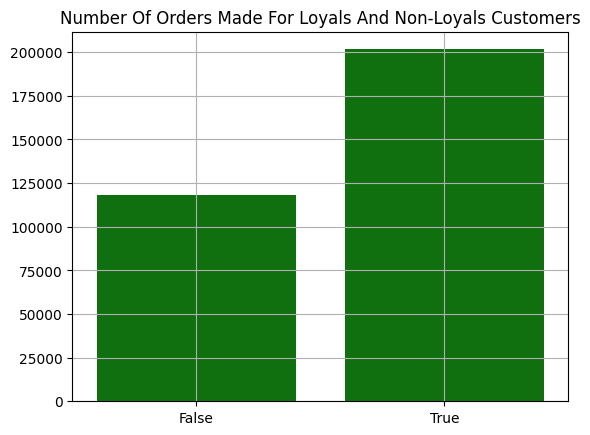

In [134]:

plt.Figure(figsize=(8,6))


plt.title("Number Of Orders Made For Loyals And Non-Loyals Customers")
sns.barplot(data=count_of_orders_made_for_loyal_nonloyal ,
            x = 'is_loyal' ,
            y = 'count' , 
            color='green'
            ).grid()
plt.xlabel(None)
plt.ylabel(None)
plt.show() # this sure from the below visulize that the loyal cusotmers are more orders orders reathen than avo

In [213]:
# نشوف الفرق في عدد الطلبات (Frequency) بين العملاء المخلصين وغير المخلصين
# حساب عدد الطلبات لكل عميل
orders_count = orders.groupby('customer_id')['order_id'].count()

# قسم العملاء
loyal_freq = orders_count.loc[orders_count.index.isin(loyal_customers)]
non_loyal_freq = orders_count.loc[~orders_count.index.isin(loyal_customers)]

print("Average number of orders for loyal customers:", loyal_freq.mean())
print("Average number of orders for non-loyal customers:", non_loyal_freq.mean())


Average number of orders for loyal customers: 3.0638297872340425
Average number of orders for non-loyal customers: 2.8699067326263488


Text(0, 0.5, '')

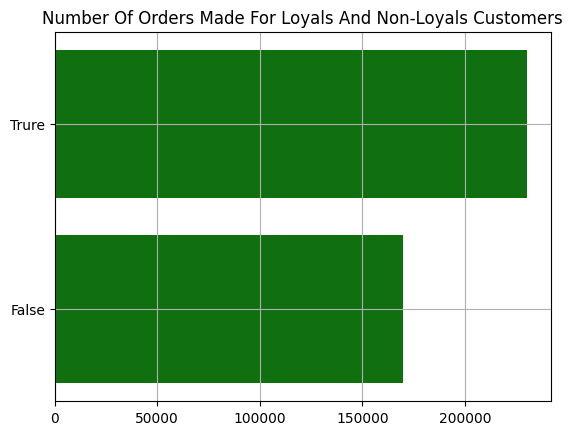

In [136]:
# instead of grouping by we can use this 


plt.Figure(figsize=(8,6))


plt.title("Number Of Orders Made For Loyals And Non-Loyals Customers")
sns.barplot(
            x = [sum(loyal_freq.values) , sum(non_loyal_freq.values)],
            y =  ['Trure' , 'False'], 
            color='green'
            ).grid()
plt.xlabel(None)
plt.ylabel(None)

C:\Users\omary\AppData\Local\Temp\ipykernel_13548\538000098.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Loyal Customers', 'Non-Loyal Customers'])


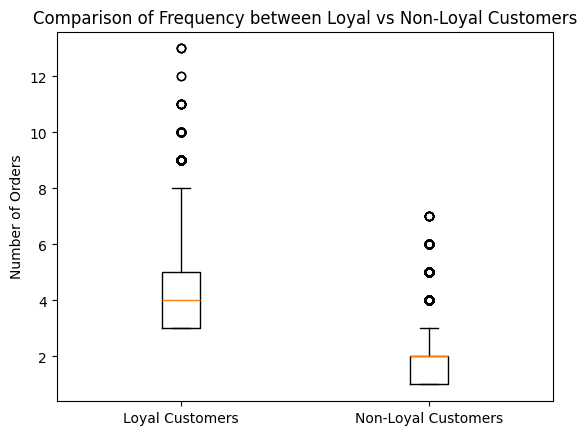

In [137]:
# رسم Boxplot
data = [loyal_freq.values, non_loyal_freq.values]

plt.boxplot(data, labels=['Loyal Customers', 'Non-Loyal Customers'])
plt.title('Comparison of Frequency between Loyal vs Non-Loyal Customers')
plt.ylabel('Number of Orders')
plt.show()

# الإنفاق الكلي (CLV = AOV × Frequency)

In [138]:
orders_comppleted.head(5)

,order_id,customer_id,order_date,status_x,payment_id,customer_id_original,paid_at,currency_original,method,status_y,bill_total,final_bill,refund_amount,net_profit
0,1,51069,2022-04-02 04:41:12,Delivered,1,51069,2022-04-04 21:41:12,EGP,debit_card,Paid,110,110,0,110
1,3,68331,2025-05-05 03:51:50,Partially Returned,3,68331,2025-05-07 00:51:50,EGP,credit_card,Partially Refunded,88,148,60,88
2,4,80695,2023-11-29 21:25:01,Delivered,4,80695,2023-12-01 02:25:01,GBP,credit_card,Paid,21,21,0,21
3,5,66044,2023-05-01 21:14:23,Delivered,5,66044,2023-05-03 13:14:23,AED,credit_card,Paid,48,48,0,48
4,7,35823,2024-02-05 08:22:03,Partially Returned,7,35823,2024-02-05 21:22:03,AED,card,Partially Refunded,-68,248,180,68


In [139]:
customers.head(5)

,customer_id,first_name,last_name,email,gender,country,is_loyal
0,1,Gavin,Hamza,gavin.hamza@outlook.com,Male,USA,False
1,2,Jack,Salem,jackdotsalem@yahoodotcom,Male,France,True
2,3,WayNe,RogErs,wayne.rogers@hotmail.com,Male,Egypt,False
3,4,Austin,Reynolds,austin.reynolds@yahoo.com,Male,USA,False
4,5,Steven,ParKer,steven.parker@gmail.com,Male,KSA,True


In [140]:
avg_

customer_id
1         91
2        134
4          7
5         81
6         34
          ..
149994    10
149996    76
149998    48
149999   129
150000    80
Name: net_profit, Length: 132053, dtype: float64

In [141]:
customers = customers.join(avg_ , 'customer_id')
customers.head()

,customer_id,first_name,last_name,email,gender,country,is_loyal,net_profit
0,1,Gavin,Hamza,gavin.hamza@outlook.com,Male,USA,False,91
1,2,Jack,Salem,jackdotsalem@yahoodotcom,Male,France,True,134
2,3,WayNe,RogErs,wayne.rogers@hotmail.com,Male,Egypt,False,NaN
3,4,Austin,Reynolds,austin.reynolds@yahoo.com,Male,USA,False,7
4,5,Steven,ParKer,steven.parker@gmail.com,Male,KSA,True,81


In [142]:
customers.head()

,customer_id,first_name,last_name,email,gender,country,is_loyal,net_profit
0,1,Gavin,Hamza,gavin.hamza@outlook.com,Male,USA,False,91
1,2,Jack,Salem,jackdotsalem@yahoodotcom,Male,France,True,134
2,3,WayNe,RogErs,wayne.rogers@hotmail.com,Male,Egypt,False,NaN
3,4,Austin,Reynolds,austin.reynolds@yahoo.com,Male,USA,False,7
4,5,Steven,ParKer,steven.parker@gmail.com,Male,KSA,True,81


In [143]:
customers = customers.join(loyal_freq , 'customer_id')
customers.head()

,customer_id,first_name,last_name,email,gender,country,is_loyal,net_profit,order_id
0,1,Gavin,Hamza,gavin.hamza@outlook.com,Male,USA,False,91,NaN
1,2,Jack,Salem,jackdotsalem@yahoodotcom,Male,France,True,134,3
2,3,WayNe,RogErs,wayne.rogers@hotmail.com,Male,Egypt,False,NaN,NaN
3,4,Austin,Reynolds,austin.reynolds@yahoo.com,Male,USA,False,7,NaN
4,5,Steven,ParKer,steven.parker@gmail.com,Male,KSA,True,81,4


In [144]:
customers=customers.rename(columns={"order_id" : "freq"})
customers.head(2)

,customer_id,first_name,last_name,email,gender,country,is_loyal,net_profit,freq
0,1,Gavin,Hamza,gavin.hamza@outlook.com,Male,USA,False,91,NaN
1,2,Jack,Salem,jackdotsalem@yahoodotcom,Male,France,True,134,3


In [145]:
customers = customers.join(non_loyal_freq , 'customer_id')
customers.head()

,customer_id,first_name,last_name,email,gender,country,is_loyal,net_profit,freq,order_id
0,1,Gavin,Hamza,gavin.hamza@outlook.com,Male,USA,False,91,NaN,3
1,2,Jack,Salem,jackdotsalem@yahoodotcom,Male,France,True,134,3,NaN
2,3,WayNe,RogErs,wayne.rogers@hotmail.com,Male,Egypt,False,NaN,NaN,NaN
3,4,Austin,Reynolds,austin.reynolds@yahoo.com,Male,USA,False,7,NaN,1
4,5,Steven,ParKer,steven.parker@gmail.com,Male,KSA,True,81,4,NaN


In [146]:
customers=customers.rename(columns={"order_id" : "freq1"})
customers.head(2)

,customer_id,first_name,last_name,email,gender,country,is_loyal,net_profit,freq,freq1
0,1,Gavin,Hamza,gavin.hamza@outlook.com,Male,USA,False,91,NaN,3
1,2,Jack,Salem,jackdotsalem@yahoodotcom,Male,France,True,134,3,NaN


In [147]:
customers['freq'] = customers['freq'].fillna(customers['freq1'])

In [148]:
customers.head(10)

,customer_id,first_name,last_name,email,gender,country,is_loyal,net_profit,freq,freq1
0,1,Gavin,Hamza,gavin.hamza@outlook.com,Male,USA,False,91,3,3
1,2,Jack,Salem,jackdotsalem@yahoodotcom,Male,France,True,134,3,NaN
2,3,WayNe,RogErs,wayne.rogers@hotmail.com,Male,Egypt,False,NaN,NaN,NaN
3,4,Austin,Reynolds,austin.reynolds@yahoo.com,Male,USA,False,7,1,1
4,5,Steven,ParKer,steven.parker@gmail.com,Male,KSA,True,81,4,NaN
5,6,Kathryn,Edwards,kathryn.edwards@outlook.com,Female,KSA,False,34,2,2
6,7,Aisha,Rashid,aisha.rashid@hotmail.com,Female,Egypt,False,71,2,2
7,8,Scarlett,Ramirez,scarlett.ramirez@gmail.com.cm,Female,UK,False,31,1,1
8,9,LogAn,Fathi,logan.fathi@gmail.com,Male,France,False,85,2,2
9,10,Christian,Youssef,christian.youssef@hotmail.com,Male,Germany,False,122,2,2


In [149]:
customers.drop(columns=['freq1'] , inplace=True)
customers = customers.rename(columns={'net_profit' : 'AOV'})

In [150]:
customers['CLV'] = customers['AOV'] * customers['freq']

In [151]:
customers.head()

,customer_id,first_name,last_name,email,gender,country,is_loyal,AOV,freq,CLV
0,1,Gavin,Hamza,gavin.hamza@outlook.com,Male,USA,False,91,3,273
1,2,Jack,Salem,jackdotsalem@yahoodotcom,Male,France,True,134,3,403
2,3,WayNe,RogErs,wayne.rogers@hotmail.com,Male,Egypt,False,NaN,NaN,NaN
3,4,Austin,Reynolds,austin.reynolds@yahoo.com,Male,USA,False,7,1,7
4,5,Steven,ParKer,steven.parker@gmail.com,Male,KSA,True,81,4,325


In [152]:
customers=customers.fillna(0)

In [153]:
customers.head(3)

,customer_id,first_name,last_name,email,gender,country,is_loyal,AOV,freq,CLV
0,1,Gavin,Hamza,gavin.hamza@outlook.com,Male,USA,False,91,3,273
1,2,Jack,Salem,jackdotsalem@yahoodotcom,Male,France,True,134,3,403
2,3,WayNe,RogErs,wayne.rogers@hotmail.com,Male,Egypt,False,0,0,0


In [154]:
loyal_customers_vlc = customers.loc[customers['customer_id'].isin(loyal_customers.values) ,'CLV']
non_loyal_customers_vlc = customers.loc[customers['customer_id'].isin(non_loyal_aov.values) ,'CLV']

In [212]:
print("Average total spending of loyal customers:", loyal_customers_vlc.mean())
print("Average total spending of non-loyal customers:", non_loyal_customers_vlc.mean())


Average total spending of loyal customers: 483.90699642218823
Average total spending of non-loyal customers: 298.1453512396694


In [156]:
# And That is as exceptcted because the loyal_customers purshed so many quantity

C:\Users\omary\AppData\Local\Temp\ipykernel_13548\4276861238.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Loyal Customers', 'Non-Loyal Customers'])


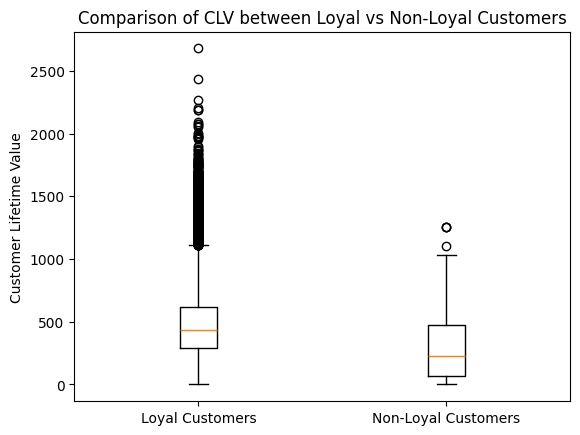

In [157]:
# رسم Boxplot
data = [loyal_customers_vlc.values, non_loyal_customers_vlc.values]

plt.boxplot(data, labels=['Loyal Customers', 'Non-Loyal Customers'])
plt.title('Comparison of CLV between Loyal vs Non-Loyal Customers')
plt.ylabel('Customer Lifetime Value')
plt.show()

Segmentation (High CLV vs Low CLV)

In [158]:
customers['segments'] = pd.qcut(customers['CLV'], 4, labels=['Low', 'Mid-Low', 'Mid-High', 'High']) # using quantile هيحسب السيجمنت بتاعه 
customers.head(10)

,customer_id,first_name,last_name,email,gender,country,is_loyal,AOV,freq,CLV,segments
0,1,Gavin,Hamza,gavin.hamza@outlook.com,Male,USA,False,91,3,273,Mid-High
1,2,Jack,Salem,jackdotsalem@yahoodotcom,Male,France,True,134,3,403,Mid-High
2,3,WayNe,RogErs,wayne.rogers@hotmail.com,Male,Egypt,False,0,0,0,Low
3,4,Austin,Reynolds,austin.reynolds@yahoo.com,Male,USA,False,7,1,7,Low
4,5,Steven,ParKer,steven.parker@gmail.com,Male,KSA,True,81,4,325,Mid-High
5,6,Kathryn,Edwards,kathryn.edwards@outlook.com,Female,KSA,False,34,2,69,Low
6,7,Aisha,Rashid,aisha.rashid@hotmail.com,Female,Egypt,False,71,2,143,Mid-Low
7,8,Scarlett,Ramirez,scarlett.ramirez@gmail.com.cm,Female,UK,False,31,1,31,Low
8,9,LogAn,Fathi,logan.fathi@gmail.com,Male,France,False,85,2,169,Mid-Low
9,10,Christian,Youssef,christian.youssef@hotmail.com,Male,Germany,False,122,2,243,Mid-High


Customer Profile لكل Segment

In [159]:
customers.groupby('segments')['CLV'].agg(
   ['count','mean','min','max'] 
).reset_index()

C:\Users\omary\AppData\Local\Temp\ipykernel_13548\2041741210.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customers.groupby('segments')['CLV'].agg(


,segments,count,mean,min,max
0,Low,37500,24,0,87
1,Mid-Low,37500,161,87,238
2,Mid-High,37501,328,238,435
3,High,37499,668,435,"3,877"


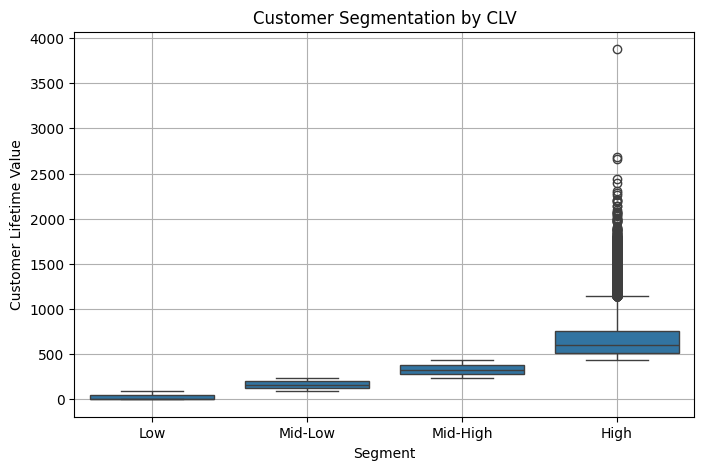

In [160]:
plt.figure(figsize=(8,5))
sns.boxplot(x=customers['segments'], y=customers['CLV']).grid()
plt.title("Customer Segmentation by CLV")
plt.ylabel("Customer Lifetime Value")
plt.xlabel("Segment")
plt.show()

In [161]:
# تحليل كل Segment
# High CLV (Top 25%):
# عملاء بيدفعوا كتير وبيشتروا كتير → أهم فئة.
# محتاجين برامج ولاء خاصة (VIP, Exclusive offers).

# Mid-High CLV (50–75%):
# عندهم إمكانيات يتحولوا لـ High لو اهتميت بيهم (Cross-sell / Upsell).

# Mid-Low CLV (25–50%):
# عملاء عاديين → محتاجين Incentives عشان يزيد إنفاقهم.

# Low CLV (Bottom 25%):
# أغلبهم One-time buyers → محتاجين إعادة استهداف (Email / Ads).

In [162]:
# Low CLV (Bottom 25%)
# قيمتهم صغيرة جدًا (معظمهم تحت 50–100).
# غالبًا One-time buyers → اشترى مرّة ومشي ودا الي وضحناه وعرفناه قبل كده 

# استراتيجيات:
# Email / Retargeting Ads.
# عروض ترحيبية أو خصومات للشراء الثاني.


# 🔹 Mid-Low CLV (25–50%)
# CLV بيتراوح تقريبًا بين 100–200.
# بيشتروا أكثر من مرة، لكن مش بشكل منتظم.

# استراتيجيات:
# Loyalty points على كل عملية شراء.
# Bundling (عروض جمع المنتجات).

# 🔹 Mid-High CLV (50–75%)
# CLV في حدود 300–500.
# دول Consistent Buyers لكن لسه مش Top.

# استراتيجيات:

# Cross-sell / Upsell (اقتراح منتجات أعلى سعر).
# حملات Personalization.

# 🔹 High CLV (Top 25%)
# واضح من الرسم إن في Outliers قوية جدًا (فيه عملاء CLV بتاعهم بيوصل لحد 2000–4000).

# دول فعلاً VIP Customers:

# بيشتروا كتير (Frequency عالية).
# وبيصرفوا مبالغ كبيرة.
# استراتيجيات:

# Exclusive programs (VIP membership, Priority support).
# Early access للمنتجات.
# هدايا/مكافآت خاصة.

In [163]:
# 📊 Insight رئيسي من الرسم:
# القيمة الحقيقية (Revenue) مش متوزعة بالتساوي → 20–25% من العملاء (High CLV) هما اللي شايلين الشغل كله.

لللتاكد تقدر تحسب إجمالي الإيرادات لكل Segment

In [164]:
# دمج الـ Segment مع CLV
segment_revenue = customers.groupby('segments')['CLV'].sum()

# نسبة كل Segment من الإيرادات
segment_revenue_pct = segment_revenue / segment_revenue.sum() * 100

print(segment_revenue_pct)

segments
Low         2
Mid-Low    14
Mid-High   28
High       57
Name: CLV, dtype: float64


C:\Users\omary\AppData\Local\Temp\ipykernel_13548\3329732198.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_revenue = customers.groupby('segments')['CLV'].sum()


In [165]:
# النتيجة :

# High CLV =  ّ60% من الإيرادات

# باقي الشرائح = 2–30%

In [167]:
# حساب الجدول التفصيلي
segment_summary = customers.groupby('segments').agg(
    Customers=('CLV', 'count'),
    Avg_CLV=('CLV', 'mean'),
    Total_Revenue=('CLV', 'sum')
)

# نسبة كل Segment من الإيرادات
segment_summary['Revenue_%'] = (segment_summary['Total_Revenue'] / segment_summary['Total_Revenue'].sum()) * 100

print(segment_summary)


          Customers  Avg_CLV  Total_Revenue  Revenue_%
segments                                              
Low           37500       24        914,805          2
Mid-Low       37500      161      6,042,678         14
Mid-High      37501      328     12,312,157         28
High          37499      668     25,036,980         57


C:\Users\omary\AppData\Local\Temp\ipykernel_13548\1177466361.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_summary = customers.groupby('segments').agg(


In [168]:
payments

,payment_id,order_id,customer_id_original,paid_at,currency_original,method,status,bill_total,final_bill
0,1,1,51069,2022-04-04 21:41:12,EGP,debit_card,Paid,110,110
3,2,2,50105,2024-11-20 19:50:30,INR,paypal,Failed,25,25
4,3,3,68331,2025-05-07 00:51:50,EGP,credit_card,Partially Refunded,88,148
10,4,4,80695,2023-12-01 02:25:01,GBP,credit_card,Paid,21,21
11,5,5,66044,2023-05-03 13:14:23,AED,credit_card,Paid,48,48
...,...,...,...,...,...,...,...,...,...
1016091,399996,399996,131043,2024-10-07 14:53:58,GBP,google_pay,Partially Refunded,86,120
1016094,399997,399997,79512,2025-02-03 17:09:11,INR,debit_card,Paid,96,96
1016096,399998,399998,9962,2025-04-28 17:45:01,GBP,debit_card,Paid,43,43
1016097,399999,399999,76425,2023-01-17 01:41:58,SAR,credit_card,Partially Refunded,490,866


C:\Users\omary\AppData\Local\Temp\ipykernel_13548\1143508125.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=payments, x='method', palette='dark').grid()


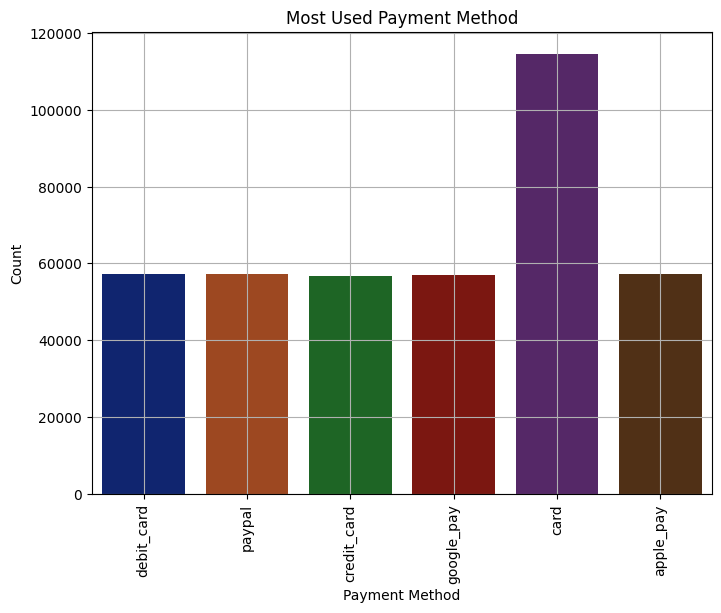

In [169]:

plt.figure(figsize=(8,6))

sns.countplot(data=payments, x='method', palette='dark').grid()

plt.title("Most Used Payment Method")
plt.xticks(rotation=90)
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()


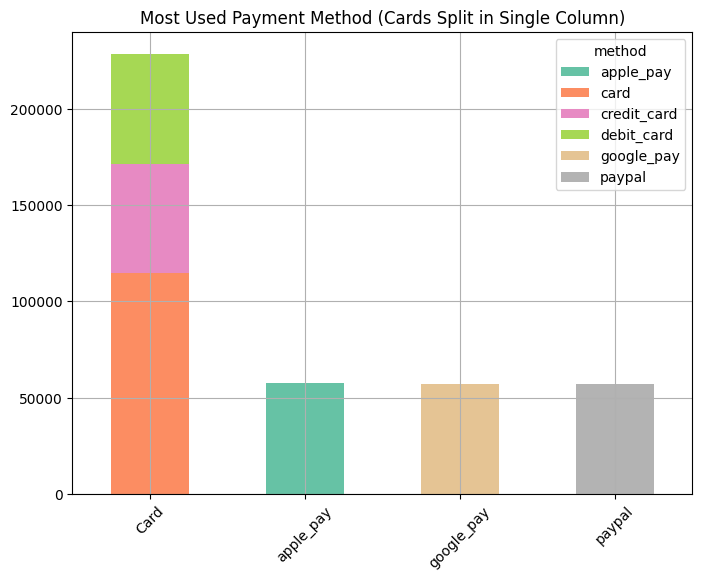

In [170]:
payments['method_grouped'] = payments['method'].apply(
    lambda x: "Card" if "card" in x else x
)
counts = payments.groupby(['method_grouped','method']).size().unstack(fill_value=0)

counts.plot(kind='bar', stacked=True, figsize=(8,6), colormap='Set2').grid()

plt.title("Most Used Payment Method (Cards Split in Single Column)")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

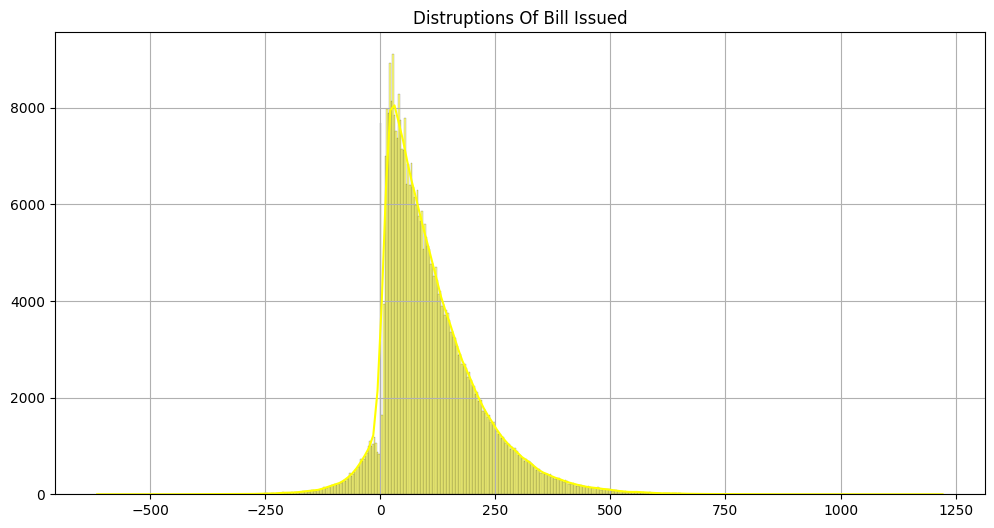

In [171]:
plt.figure(figsize=(12,6))
plt.title("Distruptions Of Bill Issued")
sns.histplot(data=payments['bill_total'] , kde=True ,color='yellow')
plt.grid()
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [172]:
sessions

,session_id,customer_id,start_time,end_time,device,ip_address,user_agent,duration,browser
0,1,91363,2025-04-11 15:37:06,2025-04-11 18:07:06,Mobile,129.153.198.180,Mozilla/5.0 (compatible; MSIE 6.0; Windows CE;...,150,Mozilla/5.0
1,2,86196,2023-03-12 04:53:36,2023-03-12 07:14:36,Mobile,133.144.103.224,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_3 r...,141,Mozilla/5.0
2,3,83283,2023-01-18 00:11:10,2023-01-18 00:46:10,Desktop,124.220.123.53,Mozilla/5.0 (compatible; MSIE 5.0; Windows 98;...,35,Mozilla/5.0
3,4,116515,2023-11-02 20:30:30,2023-11-02 22:26:30,Desktop,INVALID_IP,Mozilla/5.0 (compatible; MSIE 7.0; Windows NT ...,116,Mozilla/5.0
4,5,73961,2024-05-05 20:09:17,2024-05-05 20:14:17,Mobile,179.254.147.111,Opera/8.15.(Windows NT 5.2; ja-JP) Presto/2.9....,5,Opera/8.15.
...,...,...,...,...,...,...,...,...,...
499995,499996,5598,2025-04-21 01:07:50,2025-04-21 03:16:50,Desktop,152.85.189.155,Mozilla/5.0 (iPod; U; CPU iPhone OS 3_1 like M...,129,Mozilla/5.0
499996,499997,106570,2022-05-28 02:45:09,2022-05-28 04:33:09,Tablet,INVALID_IP,Opera/8.46.(X11; Linux x86_64; gu-IN) Presto/2...,108,Opera/8.46.
499997,499998,49560,2023-09-07 12:12:41,2023-09-07 12:21:41,Desktop,87.221.235.243,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,9,Mozilla/5.0
499998,499999,108349,2021-12-01 05:14:53,2021-12-01 05:23:53,Tablet,110.0.238.181,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,9,Mozilla/5.0


Device Usage (%)
device
Mobile    33
Tablet    33
Desktop   33
Name: proportion, dtype: float64


C:\Users\omary\AppData\Local\Temp\ipykernel_13548\1012230490.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=device_counts.index, y=device_counts.values, palette="Set2")


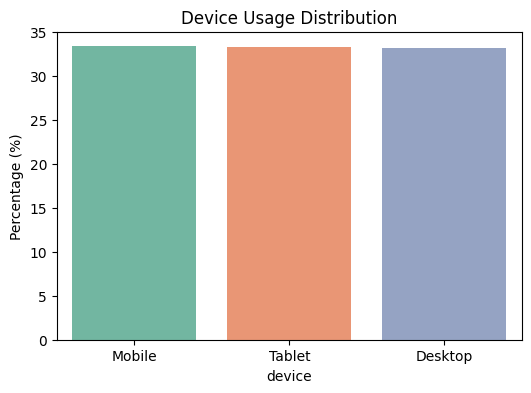


Average Duration per Device (minutes)
device
Mobile    90
Tablet    90
Desktop   90
Name: duration, dtype: float64


C:\Users\omary\AppData\Local\Temp\ipykernel_13548\1012230490.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_duration.index, y=avg_duration.values, palette="Set1")


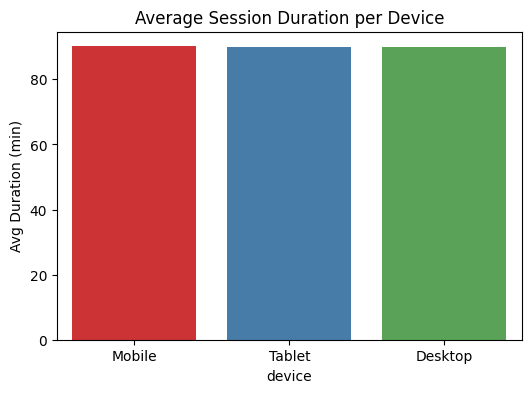


Sessions per Year
year
2021     50739
2022    122289
2023    122312
2024    122982
2025     81678
Name: session_id, dtype: int64


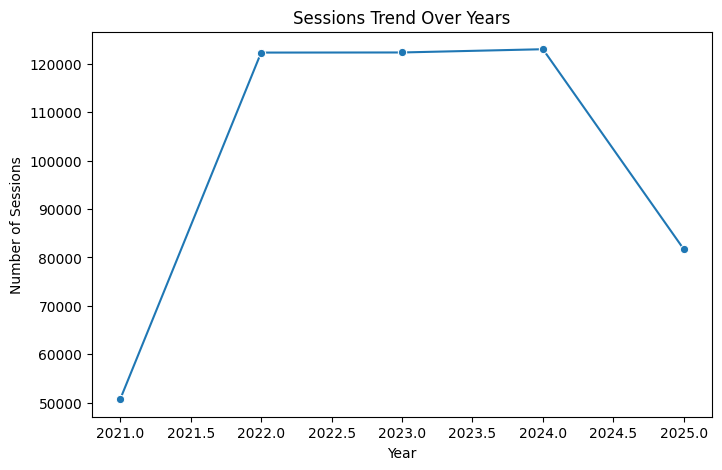

In [173]:

# 1️⃣ Distribution of Devices
device_counts = sessions['device'].value_counts(normalize=True) * 100
print("Device Usage (%)")
print(device_counts)

plt.figure(figsize=(6,4))
sns.barplot(x=device_counts.index, y=device_counts.values, palette="Set2")
plt.title("Device Usage Distribution")
plt.ylabel("Percentage (%)")
plt.show()


# 2️⃣ Avg Duration per Device
avg_duration = sessions.groupby('device')['duration'].mean().sort_values(ascending=False)
print("\nAverage Duration per Device (minutes)")
print(avg_duration)

plt.figure(figsize=(6,4))
sns.barplot(x=avg_duration.index, y=avg_duration.values, palette="Set1")
plt.title("Average Session Duration per Device")
plt.ylabel("Avg Duration (min)")
plt.show()


# 3️⃣ Sessions Trend per Year
sessions['year'] = pd.to_datetime(sessions['start_time']).dt.year
sessions_per_year = sessions.groupby('year')['session_id'].count()
print("\nSessions per Year")
print(sessions_per_year)

plt.figure(figsize=(8,5))
sns.lineplot(x=sessions_per_year.index, y=sessions_per_year.values, marker="o")
plt.title("Sessions Trend Over Years")
plt.ylabel("Number of Sessions")
plt.xlabel("Year")
plt.show()



Invalid IPs: 14119 sessions (2.82%)


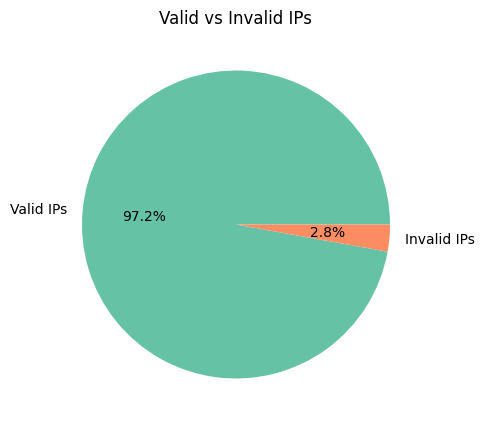

In [174]:
# 4️⃣ Check Invalid IPs
invalid_ip_count = (sessions['ip_address'] == "INVALID_IP").sum()
total_sessions = len(sessions)
invalid_ip_percentage = (invalid_ip_count / total_sessions) * 100

print(f"\nInvalid IPs: {invalid_ip_count} sessions ({invalid_ip_percentage:.2f}%)")

# رسم توضيحي للـ Valid vs Invalid IPs
ip_status = pd.Series({
    "Valid IPs": total_sessions - invalid_ip_count,
    "Invalid IPs": invalid_ip_count
})

plt.figure(figsize=(5,5))
plt.pie(ip_status, labels=ip_status.index, autopct="%1.1f%%", colors=["#66c2a5","#fc8d62"])
plt.title("Valid vs Invalid IPs")
plt.show()


C:\Users\omary\AppData\Local\Temp\ipykernel_13548\4062968327.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


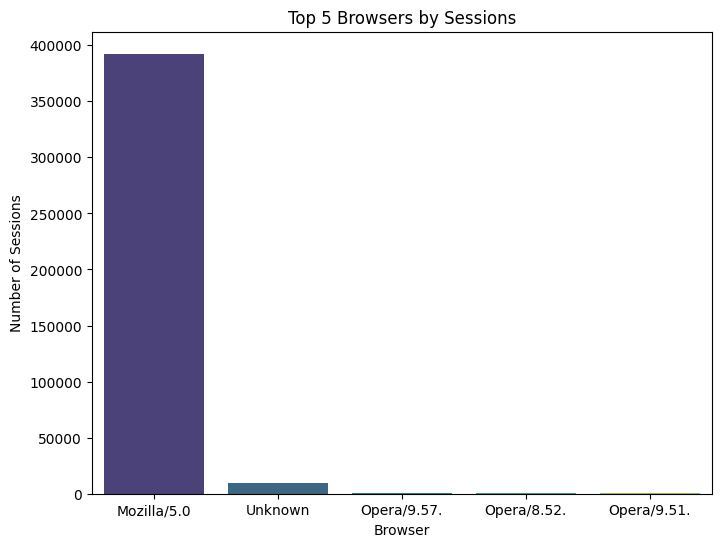

In [175]:
top_browsers = (
    sessions["browser"]
    .value_counts()
    .head(5)   # يجيب أعلى 5
)

plt.figure(figsize=(8,6))
sns.barplot(
    x=top_browsers.index,
    y=top_browsers.values,
    palette="viridis"
)

plt.title("Top 5 Browsers by Sessions")
plt.xlabel("Browser")
plt.ylabel("Number of Sessions")
plt.show()

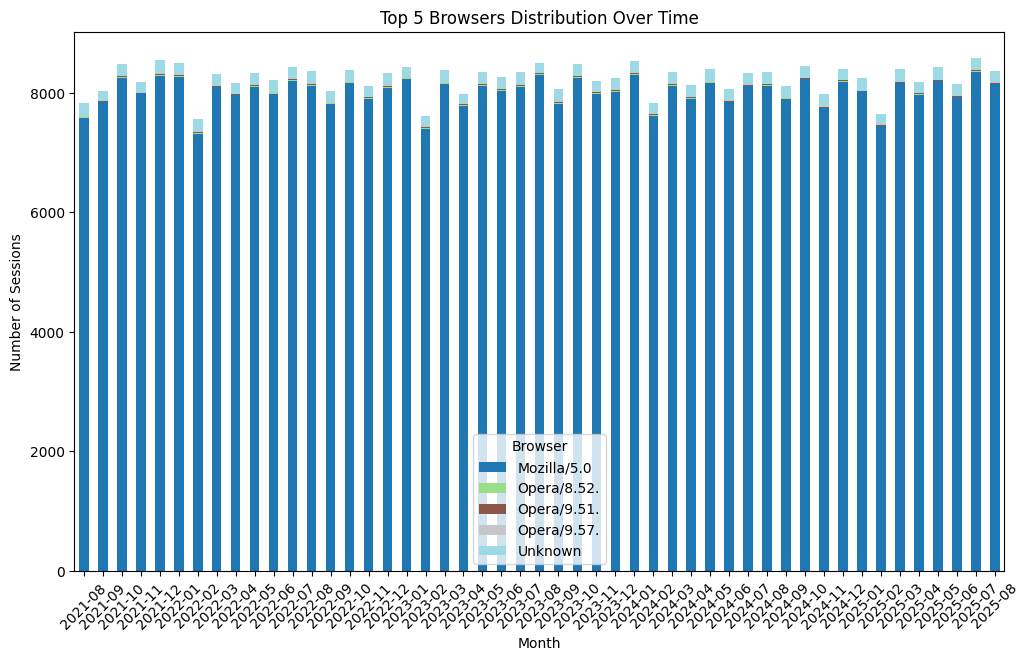

In [176]:
sessions["date"] = pd.to_datetime(sessions["start_time"])
sessions["month"] = sessions["date"].dt.to_period("M")

# نجيب Top 5 browsers بس
top5 = sessions["browser"].value_counts().head(5).index
filtered = sessions[sessions["browser"].isin(top5)]

# نعمل pivot عشان نجهز stacked bar
pivoted = (
    filtered.groupby(["month", "browser"])["session_id"]
    .count()
    .unstack(fill_value=0)
)

# نرسم Stacked Bar
pivoted.plot(
    kind="bar",
    stacked=True,
    figsize=(12,7),
    colormap="tab20"
)

plt.title("Top 5 Browsers Distribution Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Sessions")
plt.legend(title="Browser")
plt.xticks(rotation=45)
plt.show()


# نقدر نربط بين جدول الـ sessions وجدول الـ customers ونستخرج Insights

In [177]:

# customer sessions count
sessions_per_customer = (
    sessions.groupby("customer_id")["session_id"]
    .count()
    .reset_index(name="session_count")
)

# average session duration per customer
avg_duration_per_customer = (
    sessions.groupby("customer_id")["duration"]
    .mean()
    .reset_index(name="avg_session_duration")
)

# دمج مع جدول customers
customer_insights = (
    customers
    .merge(sessions_per_customer, on="customer_id", how="left")
    .merge(avg_duration_per_customer, on="customer_id", how="left")
)

# نعوض الـ NaN للعملاء اللي ما عندهمش sessions
customer_insights.fillna({"session_count":0, "avg_session_duration":0}, inplace=True)

# مثال على insight: Loyal vs Non-Loyal Avg Duration
loyal_comparison = (
    customer_insights.groupby("is_loyal")["avg_session_duration"]
    .mean()
    .reset_index()
)


In [178]:
loyal_comparison

,is_loyal,avg_session_duration
0,False,87
1,True,87


In [179]:
sessions_per_customer.head(5)

,customer_id,session_count
0,1,3
1,2,2
2,4,1
3,5,2
4,6,4


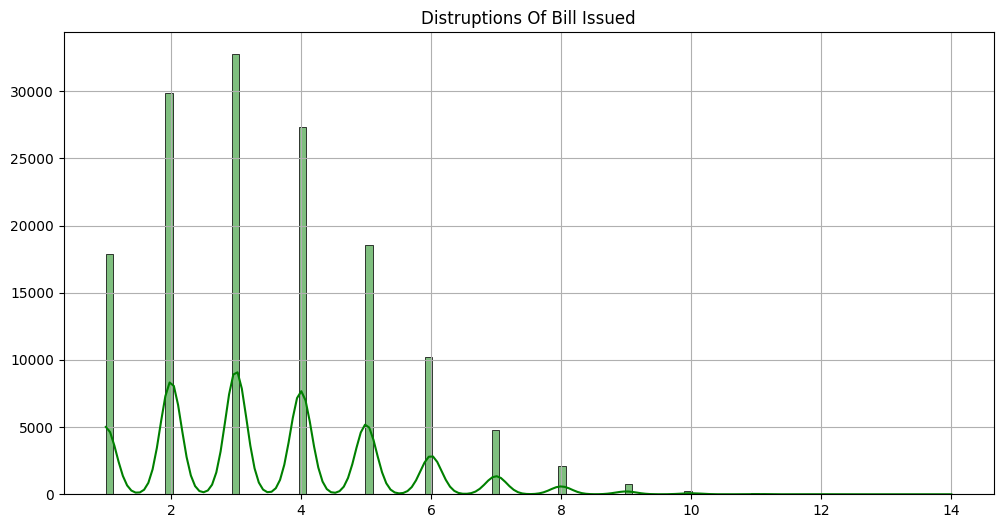

In [180]:
plt.figure(figsize=(12,6))
plt.title("Distruptions Of Bill Issued")
sns.histplot(data=sessions_per_customer['session_count'] , kde=True ,color='green')
plt.grid()
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [210]:
from scipy.stats import ttest_ind

loyal_customers = customers[customers['is_loyal'] == 1]['AOV']
non_loyal_customers = customers[customers['is_loyal'] == 0]['AOV']

# Independent Samples t-test
t_stat, p_val = ttest_ind(loyal_customers, non_loyal_customers, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("✅ The difference between the two groups is statistically significant")
else:
    print("❌ There is no statistically significant difference between the two groups")


T-statistic: 57.7360759821766
P-value: 0.0
✅ The difference between the two groups is statistically significant


In [ ]:
# Statistical analysis (t-test) showed that loyal customers spend significantly more than non-loyal customers,
#  and the difference is statistically significant (p < 0.001).

متوسط AOV لكل طلب

In [209]:
print("Average AOV of loyal customers:", loyal_customers.mean())
print("Average AOV of non-loyal customers:", non_loyal_customers.mean())


Average AOV of loyal customers: 113.23005514879252
Average AOV of non-loyal customers: 92.33498927831617


✅ 1. Chi-Square Test → Gender vs Return Behavior

In [206]:
import scipy.stats as stats

contingency_table = pd.crosstab(customers['gender'], orders['status'] == 'Fully Returned')

print("Contingency Table:\n", contingency_table)

# Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi2 Statistic:", chi2)
print("P-value:", p)

if p < 0.05:
    print("✅ There is a statistically significant relationship between gender and return behavior")
else:
    print("❌ There is no statistically significant relationship between gender and return behavior")


Contingency Table:
 status  False  True 
gender              
Female  73757   1550
Male    73116   1577
Chi2 Statistic: 0.49168714813454656
P-value: 0.48317567008655005
❌ There is no statistically significant relationship between gender and return behavior


In [207]:
contingency_table = pd.crosstab(customers['gender'], order_items['is_returned'])

print("Contingency Table:\n", contingency_table)

# Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi2 Statistic:", chi2)
print("P-value:", p)

if p < 0.05:
    print("✅ There is a statistically significant relationship between gender and return behavior")
else:
    print("❌ There is no statistically significant relationship between gender and return behavior")


Contingency Table:
 is_returned  False  True 
gender                   
Female       67191   4713
Male         66596   4704
Chi2 Statistic: 0.10039087195430621
P-value: 0.7513610757139328
❌ There is no statistically significant relationship between gender and return behavior


✅ 2. ANOVA → Compare Spending Across Countries

In [208]:
from scipy.stats import f_oneway

# Prepare data
groups = [customers[customers['country'] == c]['AOV'] 
          for c in customers['country'].unique()]

# ANOVA test
f_stat, p_val = f_oneway(*groups)

print("F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("✅ There is a significant difference in average spending across countries")
else:
    print("❌ There is no significant difference in average spending across countries")


F-statistic: 0.9025901409337809
P-value: 0.5130198337456535
❌ There is no significant difference in average spending across countries


In [ ]:
from scipy.stats import chi2_contingency

# 1. نعمل جدول تقاطعي (contingency table)
contingency = pd.crosstab(customers['method'], customers['is_loyal'])

print("📊 Contingency Table:")
print(contingency)

# 2. اختبار Chi-Square
chi2, p, dof, expected = chi2_contingency(contingency)

print("\n🔍 Chi-Square Test Result:")
print("Chi2 Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)

# 3. القرار
alpha = 0.05
if p < alpha:
    print("\n✅ يوجد ارتباط معنوي بين طريقة الدفع والولاء (significant).")
else:
    print("\n❌ لا يوجد ارتباط معنوي قوي بين طريقة الدفع والولاء.")

In [ ]:
df_orders = customers.merge(orders , on='customer_id' , how='right').merge(payments , on='order_id' , how='inner')
df_orders.shape

(400000, 23)

In [224]:
df_orders.head(5)

,customer_id,first_name,last_name,email,gender,country,is_loyal,AOV,freq,CLV,segments,order_id,order_date,status_x,payment_id,customer_id_original,paid_at,currency_original,method,status_y,bill_total,final_bill,method_grouped
0,51069,Lina,JoneS,lina.jones@gmail.com,Female,Egypt,True,93,4,371,Mid-High,1,2022-04-02 04:41:12,Delivered,1,51069,2022-04-04 21:41:12,EGP,debit_card,Paid,110,110,Card
1,50105,Megan,Hunter,megan.hunter@outlook.com,Female,India,False,53,3,158,Mid-Low,2,2024-11-19 21:50:30,Canceled,2,50105,2024-11-20 19:50:30,INR,paypal,Failed,25,25,paypal
2,68331,WaltEr,Reyes,walter.reyes@gmail.com,Male,Egypt,True,146,4,583,High,3,2025-05-05 03:51:50,Partially Returned,3,68331,2025-05-07 00:51:50,EGP,credit_card,Partially Refunded,88,148,Card
3,80695,Robert,MenDez,robert.mendez@gmail.com,Male,UK,False,46,2,92,Mid-Low,4,2023-11-29 21:25:01,Delivered,4,80695,2023-12-01 02:25:01,GBP,credit_card,Paid,21,21,Card
4,66044,Paul,MitCheLl,paul.mitchell@hotmail.com,Male,UAE,True,55,6,328,Mid-High,5,2023-05-01 21:14:23,Delivered,5,66044,2023-05-03 13:14:23,AED,credit_card,Paid,48,48,Card


In [225]:
df_orders.to_pickle("customer_segmenation_prepation.pkl")